# 1. 기본설정
## (1) 라이브러리

In [1]:
########################### 1. 기본 설정 ##########################
import time
start_time = time.time()

import os
import pandas as pd
import numpy as np
import copy

######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 
from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt

### (3) 데이터 분리 


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, concatenate
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

### (2) 분류 예측 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans

import seaborn as sns

## (2) 파라미터 설정

In [2]:
########################### 1. 기본 설정 ##########################


######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 

blur_filter = False
contour_filter = False
edge_enhance_filter = False

filter_num = 0  # 위에서 설정한 필터의 사용 개수(True의 개수)에 따라 자동 변경. 건드리지 말 것.

if blur_filter == True:
    filter_num += 1
if contour_filter == True:
    filter_num += 1
if edge_enhance_filter == True:
    filter_num += 1
    
### (3) 데이터 분리 

tts_test_size = 0.2
test_size = 0.15   # 1미만. val_size와의 합이 0.5를 넘지 않게.
val_size = 0.15   # 1미만. test_size와의 합이 0.5를 넘지 않게.

train_test_split_randomstate = 5


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 
image_size = 8
class_num = 6    # 대상 개수

is_global_feature = False  # Global feature 사용 여부 지정.
classes_num = 6
epoch_num = 20

### (2) 분류 예측 
classifier_random_state = 32



## (3) 데이터 로드

In [273]:
data_dir = '/Users/parksunghun/Desktop/aiffel1/Hackathon2022/Dataset/8x8_Data/.'  # Github 경로
#/Users/parksunghun/Downloads/GoogLeNetadamW0510-4 2.ipynb
# data_dir = 'C:/Users/User/Google 드라이브/AIFFEL/+Final project/data/'  # Google drive 경로
data_path0 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po1.csv')
data0 = pd.read_csv(data_path0)

data_path0_1 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po2.csv')
data0_1 = pd.read_csv(data_path0_1)

data_path0_2 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po3.csv')
data0_2 = pd.read_csv(data_path0_2)

data_path0_3 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po4.csv')
data0_3 = pd.read_csv(data_path0_3)

data_path0_4 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po5.csv')
data0_4 = pd.read_csv(data_path0_4)


data_path1 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po1.csv')
data1 = pd.read_csv(data_path1)

data_path1_1 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po3.csv')
data1_1 = pd.read_csv(data_path1_1)

data_path1_2 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po3.csv')
data1_2 = pd.read_csv(data_path1_2)

data_path1_3 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po4.csv')
data1_3 = pd.read_csv(data_path1_3)

data_path1_4 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po5.csv')
data1_4 = pd.read_csv(data_path1_4)


data_path2 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po1.csv')
data2 = pd.read_csv(data_path2)

data_path2_1 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po2.csv')
data2_1 = pd.read_csv(data_path2_1)

data_path2_2 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po3.csv')
data2_2 = pd.read_csv(data_path2_2)

data_path2_3 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po4.csv')
data2_3 = pd.read_csv(data_path2_3)

data_path2_4 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po5.csv')
data2_4 = pd.read_csv(data_path2_4)


data_path3 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po1.csv')
data3 = pd.read_csv(data_path3)

data_path3_1 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po2.csv')
data3_1 = pd.read_csv(data_path3_1)

data_path3_2 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po3.csv')
data3_2 = pd.read_csv(data_path3_2)

data_path3_3 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po4.csv')
data3_3 = pd.read_csv(data_path3_3)

data_path3_4 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po5.csv')
data3_4 = pd.read_csv(data_path3_4)


data_path4 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po1.csv')
data4 = pd.read_csv(data_path4)

data_path4_1 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po2.csv')
data4_1 = pd.read_csv(data_path4_1)

data_path4_2 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po3.csv')
data4_2 = pd.read_csv(data_path4_2)

data_path4_3 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po4.csv')
data4_3 = pd.read_csv(data_path4_3)

data_path4_4 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po5.csv')
data4_4 = pd.read_csv(data_path4_4)


data_path5 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po1.csv')
data5 = pd.read_csv(data_path5)

data_path5_1 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po2.csv')
data5_1 = pd.read_csv(data_path5_1)

data_path5_2 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po3.csv')
data5_2 = pd.read_csv(data_path5_2)

data_path5_3 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po4.csv')
data5_3 = pd.read_csv(data_path5_3)

data_path5_4 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po5.csv')
data5_4 = pd.read_csv(data_path5_4)



data_path6 = os.path.join(data_dir, '8x8Test_20220519_17_JungUIL_HardWood_NoCushion_Po1.csv')
data6 = pd.read_csv(data_path6)

data_path6_1 = os.path.join(data_dir, '8x8Test_20220519_17_JungUIL_HardWood_NoCushion_Po2.csv')
data6_1 = pd.read_csv(data_path6_1)

data_path6_2 = os.path.join(data_dir, '8x8Test_20220519_17_JungUIL_HardWood_NoCushion_Po3.csv')
data6_2 = pd.read_csv(data_path6_2)

data_path6_3 = os.path.join(data_dir, '8x8Test_20220519_17_JungUIL_HardWood_NoCushion_Po4.csv')
data6_3 = pd.read_csv(data_path6_3)

data_path6_4 = os.path.join(data_dir, '8x8Test_20220519_17_JungUIL_HardWood_NoCushion_Po5.csv')
data6_4 = pd.read_csv(data_path6_4)




In [258]:

data5_2.shape

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [194]:
data6.shape

(50, 65)

In [195]:
data3.shape

(50, 65)

In [196]:
data1.shape

(50, 65)

In [197]:
data2.shape

(50, 65)

In [275]:
data0 = pd.concat([data0.iloc[:50,], data0_1.iloc[:50,], data0_2.iloc[:50], data0_3.iloc[:50], data0_4.iloc[:50]])  # 150개 행만 추려 합침.
data0.shape
data0['Label'] = 0
data0

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,24.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.0,33.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,29.0,29.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,33.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.0,41.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0


In [276]:
data1 = pd.concat([data1.iloc[:50,], data1_1.iloc[:50,], data1_2.iloc[:50], data1_3.iloc[:50], data1_4.iloc[:50] ])  # 150개 행만 추려 합침.
data1['Label'] = 1
data1.shape

(250, 65)

In [277]:
data2 = pd.concat([data2.iloc[:50,], data2_1.iloc[:50,], data2_2.iloc[:50], data2_3.iloc[:50], data2_4.iloc[:50] ])  # 150개 행만 추려 합침.
data2['Label'] = 2
data2.shape

(250, 65)

In [278]:
data3 = pd.concat([data3.iloc[:50,], data3_1.iloc[:50,], data3_2.iloc[:50], data3_3.iloc[:50], data3_4.iloc[:50] ])  # 150개 행만 추려 합침.
data3['Label'] = 3
data3.shape

(250, 65)

In [281]:
data4 = pd.concat([data4.iloc[:50,], data4_1.iloc[:50,], data4_2.iloc[:50], data4_3.iloc[:50], data4_4.iloc[:50] ])  # 150개 행만 추려 합침.
data4['Label'] = 4
data4.shape

(250, 65)

In [282]:
data5 = pd.concat([data5.iloc[:50,], data5_1.iloc[:50,], data5_2.iloc[:50], data5_3.iloc[:50], data5_4.iloc[:50] ])  # 150개 행만 추려 합침.
data5['Label'] = 5
data5.shape

(250, 65)

In [283]:
data6 = pd.concat([data6.iloc[:50,], data6_1.iloc[:50,], data6_2.iloc[:50], data6_3.iloc[:50], data6_4.iloc[:50] ])  # 150개 행만 추려 합침.
data6['Label'] = 6
data6.shape

(250, 65)

In [284]:
data = pd.concat([data0.iloc[:250,], data1.iloc[:250,], data2.iloc[:250], data3.iloc[:250], data4.iloc[:250], data5.iloc[:250]])  # 150개 행만 추려 합침.
data.shape

(1500, 65)

In [269]:
# data = data.drop(['Unnamed: 0'], axis = 1)
data[:80]
data.shape

(1500, 65)

In [270]:
data = data.sample(frac = 1)
# data = data.sample(frac = 1).reset_index(drop = True)
data.head()

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64,Label
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
47,0.0,0.0,0.0,16.0,0.0,72.0,0.0,0.0,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,0.0,0.0,0.0,19.0,40.0,94.0,0.0,0.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [285]:
feature = data.iloc[:,:-1]
label = data.iloc[:, -1]
print(feature.shape)
print(label.shape)

(1500, 64)
(1500,)


In [286]:
label

0     0
1     0
2     0
3     0
4     0
     ..
45    5
46    5
47    5
48    5
49    5
Name: Label, Length: 1500, dtype: int64

In [287]:
label.sort_values(ascending = True)


0     0
9     0
10    0
11    0
12    0
     ..
38    5
39    5
40    5
27    5
49    5
Name: Label, Length: 1500, dtype: int64

In [175]:
!pip install tensorflow_hub 

In [288]:
temp_array_feature = feature.to_numpy()#데이터프레임을 넘파이 배열로

list_feature = []
for i in range(len(temp_array_feature)):
    reshaped_array = temp_array_feature[i].reshape(image_size,image_size)
    list_feature.append(reshaped_array)
    
array_feature = np.array(list_feature)
array_feature = array_feature.astype('uint8')
array_feature.shape

(1500, 8, 8)

In [289]:

# import tensorflow_hub as hub

# upsize_factor = 1  # 0: 1배, 1: 4배, 2:16배... 1올라갈 때마다 4배씩 증가.

# upsized_image_size = 8 * (4 ** upsize_factor)

데이터 이미지화


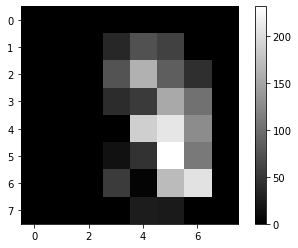

In [290]:
print('데이터 이미지화')
plt.imshow(array_feature[0] , cmap='gray')
plt.colorbar();

In [291]:
# print("사이즈 변경 전 이미지 크기: {}".format(array_feature[1].shape))
# def image_upsize(array_feature, upsize_factor):
    
#     SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1" 
#     super_resolution_model = hub.load(SAVED_MODEL_PATH) # 3채널에서만 작동.
#     tf_array_feature = tf.convert_to_tensor(array_feature)
#     tf_array_feature = tf.cast(tf_array_feature, tf.float32) # uint8 -> float32
#     upsized_array_feature = []
#     for i, array in enumerate(tf_array_feature):
        
#         # model은 3채널용이므로, 이미지를 1채널 -> 3채널로 확장
#         temp_array = copy.deepcopy(array)
#         temp_array = tf.expand_dims(temp_array, 2)
#         temp_array = tf.expand_dims(temp_array, 0)
#         temp_array_2 = copy.deepcopy(temp_array)
#         temp_array_3 = copy.deepcopy(temp_array)
#         temp_array = np.concatenate((temp_array, temp_array_2), axis = 3)
#         temp_array = np.concatenate((temp_array, temp_array_3), axis = 3)
    
#         # 업사이즈 적용
#         if upsize_factor > 0:
#             for i in range(upsize_factor):
#                 temp_array = super_resolution_model(temp_array) 
        
#         # 3채널 -> 1채널로 복구
#         upsized_temp_array = tf.squeeze(temp_array)
#         grayscale_upsized_temp_array = (upsized_temp_array[:,:,0] + 
#                                         upsized_temp_array[:,:,1] + upsized_temp_array[:,:,2])/3
#         upsized_array_feature.append(grayscale_upsized_temp_array)
#         if i == 3:
#             break
#     return np.array(upsized_array_feature)

# array_feature = image_upsize(array_feature, upsize_factor)
# print("사이즈 변경 후 이미지 크기: {}".format(array_feature[1].shape))

In [292]:
array_feature[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  36,  74,  60,   0,   0],
       [  0,   0,   0,  76, 161,  86,  43,   0],
       [  0,   0,   0,  41,  53, 154, 103,   0],
       [  0,   0,   0,   0, 188, 209, 127,   0],
       [  0,   0,   0,  16,  46, 232, 110,   0],
       [  0,   0,   0,  54,   4, 170, 205,   0],
       [  0,   0,   0,   0,  26,  24,   0,   0]], dtype=uint8)

# 2. 데이터 전처리
## (1) 데이터 증강

In [293]:
# array_feature에 filter augmented data를 concatenate.
def filter_concat(array_feature, blur_filter = False, contour_filter = False, 
                  edge_enhance_filter = False):
    
    filteradded_array_feature = []
    
    for i, j in enumerate(array_feature):
        image = Image.fromarray(array_feature[i])
        stack_array = np.expand_dims(array_feature[i], axis = 2)
        
        if blur_filter:
            image_BLUR = image.filter(ImageFilter.BLUR)
            blur_array_feature = np.array(image_BLUR)
            blur_stack_array = np.expand_dims(blur_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, blur_stack_array), axis = 2)
            
        if contour_filter:
            image_CONTOUR = image.filter(ImageFilter.CONTOUR)
            contour_array_feature = np.array(image_CONTOUR)
            contour_stack_array = np.expand_dims(contour_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, contour_stack_array), axis = 2)
            
        if edge_enhance_filter:
            image_EDGE_ENHANCE = image.filter(ImageFilter.EDGE_ENHANCE)
            edge_enhance_array_feature = np.array(image_EDGE_ENHANCE)
            edge_enhance_stack_array = np.expand_dims(edge_enhance_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, edge_enhance_stack_array), axis = 2)
    
        filteradded_array_feature.append(stack_array)
    
    filteradded_array_feature = np.array(filteradded_array_feature)
    return filteradded_array_feature
    


In [294]:
final_feature = filter_concat(array_feature, blur_filter = blur_filter, contour_filter = contour_filter, 
                  edge_enhance_filter = edge_enhance_filter)

final_feature.shape

(1500, 8, 8, 1)

## (3) 데이터 분리

In [295]:
# Train data 초반 70%, Test data 다음 15%, Validation data 마지막 15%
local_X_train = final_feature[:int(len(feature)*(1-test_size-val_size))]
local_X_test = final_feature[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
local_X_val = final_feature[int(len(feature)*(1-val_size)):]

y_train = label[:int(len(feature)*(1-test_size-val_size))]
y_test =  label[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
y_val = label[int(len(feature)*(1-val_size)):]

# local_X_train, local_X_test, y_train, y_test = train_test_split(final_feature, label, 
#                                                     test_size = tts_test_size, random_state= train_test_split_randomstate)    ## test_size를 변경하며 시험.
# Normalization
local_X_train = local_X_train / 255.0
local_X_test = local_X_test / 255.0
local_X_val = local_X_val / 255.0

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = tf.data.Dataset.from_tensor_slices((local_X_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((local_X_test, y_test))
local_X_train.shape

(1050, 8, 8, 1)

In [296]:
# y_train.sort_values(ascending = False)
y_train

0     0
1     0
2     0
3     0
4     0
     ..
45    4
46    4
47    4
48    4
49    4
Name: Label, Length: 1050, dtype: int64

In [297]:

# Train data 초반 70%, Test data 다음 15%, Validation data 마지막 15%
local_X_train = final_feature[:int(len(feature)*(1-test_size-val_size))]
local_X_test = final_feature[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
local_X_val = final_feature[int(len(feature)*(1-val_size)):]

y_train = label[:int(len(feature)*(1-test_size-val_size))]
y_test =  label[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
y_val = label[int(len(feature)*(1-val_size)):]

# local_X_train, local_X_test, y_train, y_test = train_test_split(final_feature, label, 
#                                                     test_size = tts_test_size, random_state= train_test_split_randomstate)    ## test_size를 변경하며 시험.
# Normalization
local_X_train = local_X_train / 255.0
local_X_test = local_X_test / 255.0
local_X_val = local_X_val / 255.0

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = tf.data.Dataset.from_tensor_slices((local_X_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((local_X_test, y_test))
local_X_train.shape

(1050, 8, 8, 1)

In [298]:
global_X_train = feature[:int(len(feature)*(1-test_size-val_size))]
global_X_test = feature[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
global_X_val = feature[int(len(feature)*(1-val_size)):]
global_X_train.shape

(1050, 64)

In [299]:
if (y_train.any < -1):
    y_train = 1

TypeError: '<' not supported between instances of 'method' and 'int'

# 3. 모델 학습

## (1) 모델 설계 및 대표 벡터 추출

In [26]:
# google net


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate


In [20]:
# 아래 코드는 googLeNet 모델 부분


In [27]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [188]:
class_num = 7
# custom googlenet
image_size = 8
# A2 MODEL
# input layer 
local_input = Input(shape = (image_size, image_size, filter_num+1), name = 'Local_feature_Input')

# convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
X = Conv2D(filters = 64, kernel_size = (3,3), strides = 2, padding = 'valid', activation = 'relu')(local_input)

# max-pooling layer: pool_size = (3,3), strides = 2
X = MaxPooling2D(pool_size = (3,3), padding='same', strides = 2)(X)

# convolutional layer: filters = 64, strides = 1
X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

# convolutional layer: filters = 192, kernel_size = (3,3)
X = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

# max-pooling layer: pool_size = (3,3), strides = 2
X = MaxPooling2D(pool_size= (3,3), padding='same', strides = 2)(X)

### 여기까지 stem


# 1st Inception block
X = Inception_block(X, f1 = 32, f2_conv1 = 48, f2_conv3 = 64, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

# 2nd Inception block
X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

# max-pooling layer: pool_size = (3,3), strides = 2
X = MaxPooling2D(pool_size= (3,3), padding='same', strides = 2)(X)

# 3rd Inception block
X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

# # Extra network 1:
# X1 = AveragePooling2D(pool_size = (5,5), padding='same', strides = 3)(X)
# X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
# X1 = Flatten()(X1)
# X1 = Dense(1024, activation = 'relu')(X1)
# X1 = Dropout(0.7)(X1)
# X1 = Dense(5, activation = 'softmax')(X1)


# # 4th Inception block
# X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

# # 5th Inception block
# X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

# # 6th Inception block
# X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

# # Extra network 2:
# X2 = AveragePooling2D(pool_size = (5,5), padding='same', strides = 3)(X)
# X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
# X2 = Flatten()(X2)
# X2 = Dense(1024, activation = 'relu')(X2)
# X2 = Dropout(0.7)(X2)
# X2 = Dense(1000, activation = 'softmax')(X2)


# # 7th Inception block
# X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
#                   f3_conv5 = 128, f4 = 128)

# # max-pooling layer: pool_size = (3,3), strides = 2
# X = MaxPooling2D(pool_size = (3,3), padding='same', strides = 2)(X)

# # 8th Inception block
# X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

# # 9th Inception block
# X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

# Global Average pooling layer 
X = GlobalAveragePooling2D(name = 'GAPL')(X)

# Dropoutlayer 
X = Dropout(0.8)(X)

# output layer 
#X = Dense(6, activation = 'softmax')(X)
  # Local feature + Global feature 사용
if is_global_feature: 
    # Concatenation block
    global_input = Input(shape = (len(global_X_train.columns)), name = 'Global feature Input')
    concat = concatenate([X, global_input], name = 'Feature_concatenation')
    
    # Final block
    prediction = Dense(7, activation = 'softmax', name = 'prediction')(X)
    concatgoogle_NET = Model(inputs = [local_input, global_input], outputs = prediction, name = 'Concat_GOOGLEnet_model')


# Local feature만 사용.
else:
    # Simpple flatten block
    # Final block
    prediction = Dense(7, activation = 'softmax', name = 'prediction')(X)    
    simplegoogle_NET = Model(inputs = local_input, outputs = prediction, name = 'Simpler_google_model')


simplegoogle_NET.summary()
  # model
 

Model: "Simpler_google_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Local_feature_Input (InputLaye  [(None, 8, 8, 1)]   0           []                               
 r)                                                                                               
                                                                                                  
 conv2d_98 (Conv2D)             (None, 3, 3, 64)     640         ['Local_feature_Input[0][0]']    
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 2, 2, 64)    0           ['conv2d_98[0][0]']              
 )                                                                                                
                                                                               

In [187]:
# concat_VGG16
# 최참님 모델

#a1 으로 변수설정


# 1st block
local_input = Input(shape = (image_size, image_size, filter_num+1), name = 'Local_feature_Input')
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv1')(local_input)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same', name = 'block1_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block1_pool')(x)

# 2nd block
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv1')(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block2_pool')(x)

# 3rd block
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv1')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv2')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv3')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block3_pool')(x)

# 4th block
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv1')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv2')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv3')(x)
# x = MaxPool2D((2,2), strides = (2,2), name = 'block4_pool')(x)

# 5th block
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv1')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv2')(x)
# x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv3')(x)
# x = MaxPool2D((2,2), strides = (2,2), name = 'block5_pool')(x)

# Local feature + Global feature 사용
if is_global_feature: 
    # Concatenation block
    x = Flatten(name = 'flatten')(x)
    global_input = Input(shape = (len(global_X_train.columns)), name = 'Global feature Input')
    concat = concatenate([x, global_input], name = 'Feature_concatenation')
    
    # Final block
    #x = Dense(1024, activation = 'relu', name = 'fc1')(concat)  # 초기값 4096
    #output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096
    output = GlobalAveragePooling2D(name='gap1')(x) 
    prediction = Dense(classes_num, activation = 'softmax', name = 'prediction')(output)
    modified_VGG16_model = Model(inputs = [local_input, global_input], outputs = prediction, name = 'Concat_VGG16_model')


# Local feature만 사용.
else:
    # Simpple flatten block
    #x = Flatten(name = 'flatten')(x)
    
    # Final block
    #x = Dense(1024, activation = 'relu', name = 'fc1')(x)       # 초기값 4096
    #output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096
    output = GlobalAveragePooling2D(name='gap1')(x) 
    prediction = Dense(7, activation = 'softmax', name = 'prediction')(output)    
    modified_VGG16_model = Model(inputs = local_input, outputs = prediction, name = 'Simpler_VGG16_model')


modified_VGG16_model.summary()

Model: "Simpler_VGG16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Local_feature_Input (InputL  [(None, 8, 8, 1)]        0         
 ayer)                                                           
                                                                 
 block1_conv1 (Conv2D)       (None, 8, 8, 64)          640       
                                                                 
 block1_conv2 (Conv2D)       (None, 8, 8, 64)          36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 4, 4, 64)          0         
                                                                 
 block2_conv1 (Conv2D)       (None, 4, 4, 128)         73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 4, 4, 128)         147584    
                                               

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import categorical_crossentropy
# optimization method 
import numpy as np
import pandas as pd

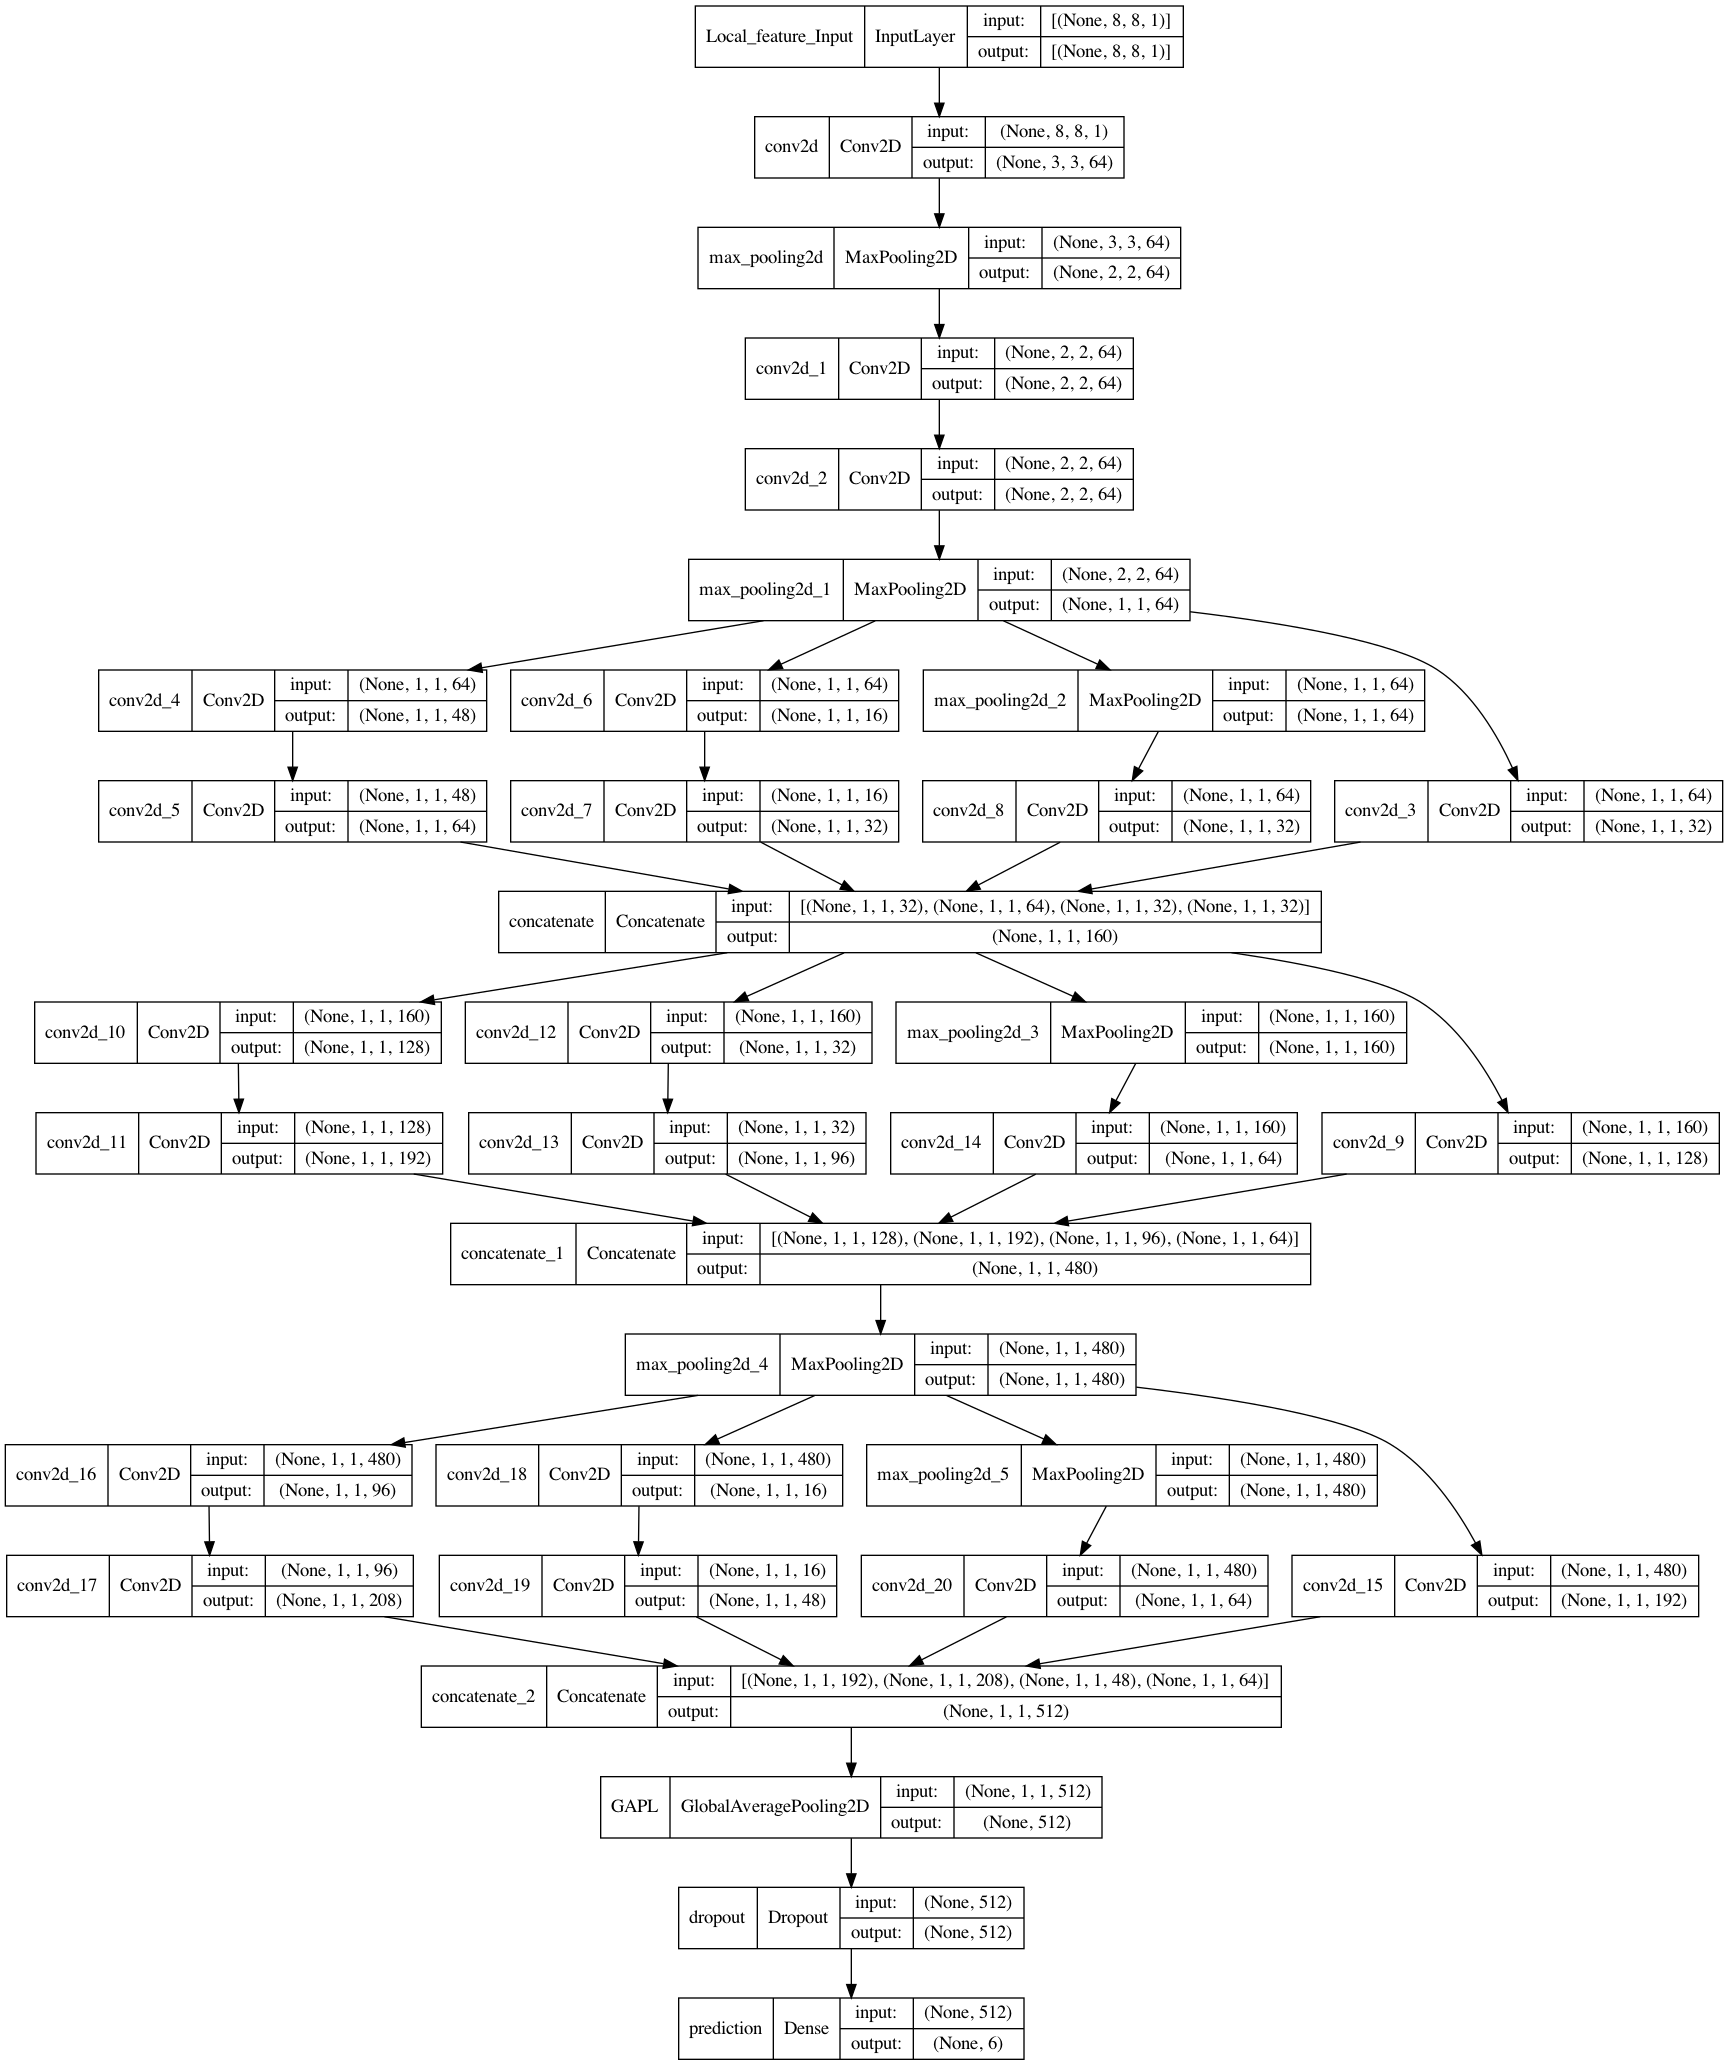

In [31]:
plot_model(simplegoogle_NET, 'simplegoogle_NET.png', show_shapes = True)

In [838]:
!pip install pydot


In [842]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.2 MB/s eta 0:00:00


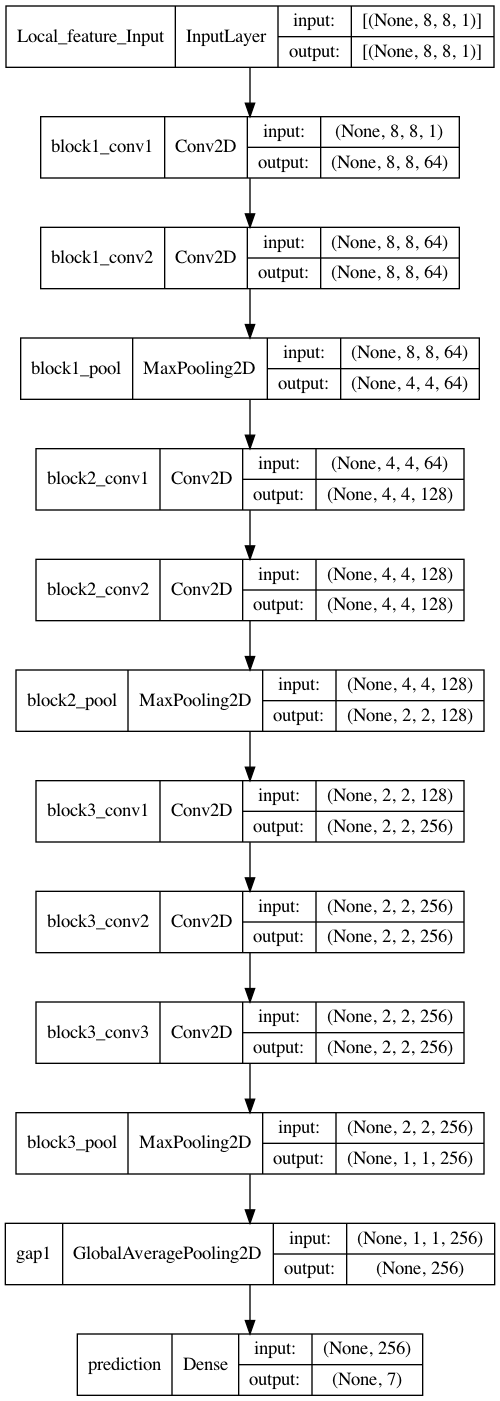

In [41]:
plot_model(modified_VGG16_model, 'modified_VGG16_model.png', show_shapes = True)

In [33]:
plot_model(resnet_model, 'resnet_model.png', show_shapes = True)

NameError: name 'resnet_model' is not defined

In [845]:
tf.keras.utils.plot_model(
    resnet_model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
import os; os.environ["TF_KERAS"]='1'

In [23]:
# 모델 변수에 넣기 

In [34]:
a1 = modified_VGG16_model # 참님 모델

In [189]:
a2 = simplegoogle_NET # 성훈님 모델

In [50]:
# 모델 변수에 넣기 

In [26]:
!pip install --user tensorflow-addons==0.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:0000:01


In [36]:
import numpy as np
from keras.layers import Input, Dense, LSTM
from keras.models import Model
from keras.regularizers import l1, l2, l1_l2
#from keras_adamw import AdamW

In [ ]:
#글로벌 에버리지 풀링
# y = tf.keras.layers.GlobalAveragePooling2D()(x)


In [29]:
#https://stackoverflow.com/questions/50056356/could-not-interpret-optimizer-identifier-error-in-kerasimport tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
#from keras.optimizers import adam
import sys
import os 
# from keras_adamw import AdamW
from keras import backend as K
# sys.path.append(os.pardir)
# from keras_optimizers import AdamW
#from keras_adamw import AdamW
#from keras_adamw.optimizers import AdamW
#from tensorflow.python.keras.optimizers import Adam
#from keras_radam import RAdam
#from keras.optimizers import adam
from tensorflow_addons.optimizers import AdamW#weight_decay 씀
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.ops import math_ops



Epoch 1/30
20/20 [==============================] - 4s 161ms/step - loss: 6.4242 - accuracy: 0.1429
Epoch 2/30
20/20 [==============================] - 3s 141ms/step - loss: 1.7932 - accuracy: 0.1698
Epoch 3/30
20/20 [==============================] - 3s 142ms/step - loss: 1.7923 - accuracy: 0.1603
Epoch 4/30
20/20 [==============================] - 3s 139ms/step - loss: 1.7914 - accuracy: 0.1587
Epoch 5/30
20/20 [==============================] - 3s 139ms/step - loss: 1.7917 - accuracy: 0.1714
Epoch 6/30
20/20 [==============================] - 3s 140ms/step - loss: 1.7918 - accuracy: 0.1762
Epoch 7/30
20/20 [==============================] - 3s 141ms/step - loss: 1.7910 - accuracy: 0.1762
Epoch 8/30
20/20 [==============================] - 3s 138ms/step - loss: 1.7914 - accuracy: 0.1762
Epoch 9/30
20/20 [==============================] - 3s 143ms/step - loss: 1.7915 - accuracy: 0.1508
Epoch 10/30
20/20 [==============================] - 3s 138ms/step - loss: 1.7909 - accuracy: 0.1762

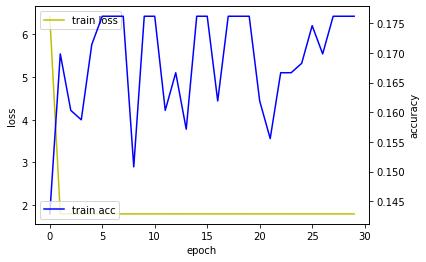

In [82]:
# 이건 googLenet 을 위한 코드 

a01 = AdamW(learning_rate =0.01, beta_1=0.9, beta_2 = 0.999,amsgrad = True,\
                   #model = None,
                   #use_cosine_annealing = True,
                   #zero_penalties = 1,
                   #lr_multipliers = None,
                   #autorestart = 1,
                   #eta_min = 0.2,
                   #eta_max = 0.9,
                   #t_cur = 2,
                   weight_decay = 1e-4,
                   #weight_decays=0.1,
                   #total_iterations = 3,
                   #init_verbose = 1,
                   epsilon = 1e-07,
                   
                 )



a1.compile(optimizer = a01,
             #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

epoch_num= 30

if is_global_feature:
    hist = a1.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    a1.evaluate([local_X_train, global_X_train], y_test, verbose = 1)
else:
    hist = a1.fit(local_X_train, y_train, epochs = epoch_num)
    a1.evaluate(local_X_test, y_test, verbose = 1)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

# loss_ax.plot(hist.history['val_loss'], 'y', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

# loss_ax.plot(hist.history['val_accuracy'], 'y', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [191]:
y_train['label']=-9223372036854775808

Epoch 1/100
33/33 [==============================] - 2s 9ms/step - loss: 1.4429 - accuracy: 0.3419
Epoch 2/100
33/33 [==============================] - 0s 9ms/step - loss: 1.2243 - accuracy: 0.4362
Epoch 3/100
33/33 [==============================] - 0s 9ms/step - loss: 1.1958 - accuracy: 0.4171
Epoch 4/100
33/33 [==============================] - 0s 9ms/step - loss: 1.4424 - accuracy: 0.3029
Epoch 5/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5400 - accuracy: 0.2476
Epoch 6/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5414 - accuracy: 0.2257
Epoch 7/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5333 - accuracy: 0.2371
Epoch 8/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5295 - accuracy: 0.2229
Epoch 9/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5292 - accuracy: 0.2486
Epoch 10/100
33/33 [==============================] - 0s 8ms/step - loss: 1.5299 - accuracy: 0.2333
Epoch 11/

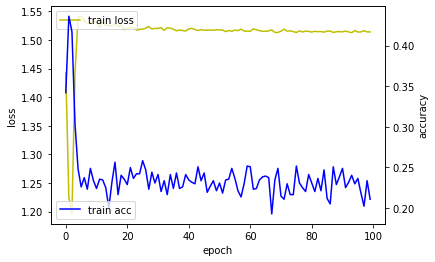

In [300]:

# 이건 googLenet 을 위한 코드 
from tensorflow_addons.optimizers import AdamW#weight_decay 씀

a01 = AdamW(learning_rate =0.01, beta_1=0.9, beta_2 = 0.999,amsgrad = True,\
                   #model = None,
                   #use_cosine_annealing = True,
                   #zero_penalties = 1,
                   #lr_multipliers = None,
                   #autorestart = 1,
                   #eta_min = 0.2,
                   #eta_max = 0.9,
                   #t_cur = 2,
                   weight_decay = 1e-4,
                   #weight_decays=0.1,
                   #total_iterations = 3,
                   #init_verbose = 1,
                   epsilon = 1e-07,
                   
                 )



a2.compile(optimizer = a01,
             #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

epoch_num= 100

if is_global_feature:
    hist = a2.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    a2.evaluate([local_X_train, global_X_train], y_test, verbose = 1)
else:
    hist = a2.fit(local_X_train, y_train, epochs = epoch_num)
    a2.evaluate(local_X_test, y_test, verbose = 1)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

# loss_ax.plot(hist.history['val_loss'], 'y', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

# loss_ax.plot(hist.history['val_accuracy'], 'y', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [55]:

os.environ['TF_KERAS'] = '1'


In [30]:
import sys

print("--sys.version--")
print(sys.version)

--sys.version--
3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]


In [31]:
import tensorflow as tf

print(tf.__version__)
# 2.5.0

2.7.0


In [28]:
pip install --upgrade tensorflow==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 66.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
Note: you may need to restart the kernel to use u

In [29]:
!pip install tensorflow-gpu== 2.7.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu== (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2)
ERROR: No matching distribution found for tensorflow-gpu==


In [31]:
# Custom vgg16 함수 
# MAXpool2D 씀


def VGG16():
  # Initialize the model
  model = Sequential()

  # layer 1-2: 2 convolutional layers + 1 max-pooling layer 
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (8,8,1)))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2), strides = (1,1), padding='valid')

  # number of filters and convolutions in each layer:
  filters_convs = [(128, 2), (256, 3), (512, 3), (512,3)]
  
  for n_filters, n_convs in filters_convs:
    for _ in np.arange(n_convs):
      model.add(Conv2D(filters = n_filters, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # max-pooling layer 
    model.add(MaxPool2D(pool_size = (2,2), strides = (1,1), padding='valid')
#tf.keras.layers.GlobalAveragePooling2D()
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1000,activation = 'softmax'))

  # compile the model with a loss function, a metric and an optimization method
  opt = a01 # stochastic gradient descent method with learning rate lr = 0.01
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy'])
  return model
              
              
              

SyntaxError: invalid syntax (2939258462.py, line 15)

In [32]:
VGG16global = VGG16()

NameError: name 'VGG16' is not defined

In [33]:
#https://stackoverflow.com/questions/50056356/could-not-interpret-optimizer-identifier-error-in-kerasimport tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
#from keras.optimizers import adam
import sys
import os 
# from keras_adamw import AdamW
from keras import backend as K
# sys.path.append(os.pardir)
# from keras_optimizers import AdamW
#from keras_adamw import AdamW
#from keras_adamw.optimizers import AdamW
#from tensorflow.python.keras.optimizers import Adam
#from keras_radam import RAdam
#from keras.optimizers import adam
from tensorflow_addons.optimizers import AdamW#weight_decay 씀
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.ops import math_ops

a01 = AdamW(learning_rate =0.001, beta_1=0.9, beta_2 = 0.999,amsgrad = True,\
                   #model = None,
                   #use_cosine_annealing = True,
                   #zero_penalties = 1,
                   #lr_multipliers = None,
                   #autorestart = 1,
                   #eta_min = 0.2,
                   #eta_max = 0.9,
                   #t_cur = 2,
                   weight_decay = 5e-4,
                   #weight_decays=0.1,
                   #total_iterations = 3,
                   #init_verbose = 1,
                   epsilon = 1e-07,
                   
                 )



VGG16global.compile(optimizer = a01,
             #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

epoch_num= 30
if is_global_feature:
    hist = VGG16global.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    VGG16global.evaluate([local_X_train, global_X_train], y_test, verbose = 2)
else:
    hist = VGG16global.fit(local_X_train, y_train, epochs = epoch_num)
    VGG16global.evaluate(local_X_test, y_test, verbose = 2)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


NameError: name 'VGG16global' is not defined

In [159]:
def prelu(x, alpha): 
    return tf.maximum(tf.zeros(tf.shape(x)), x) + alpha * tf.minimum(tf.zeros(tf.shape(x)), x)

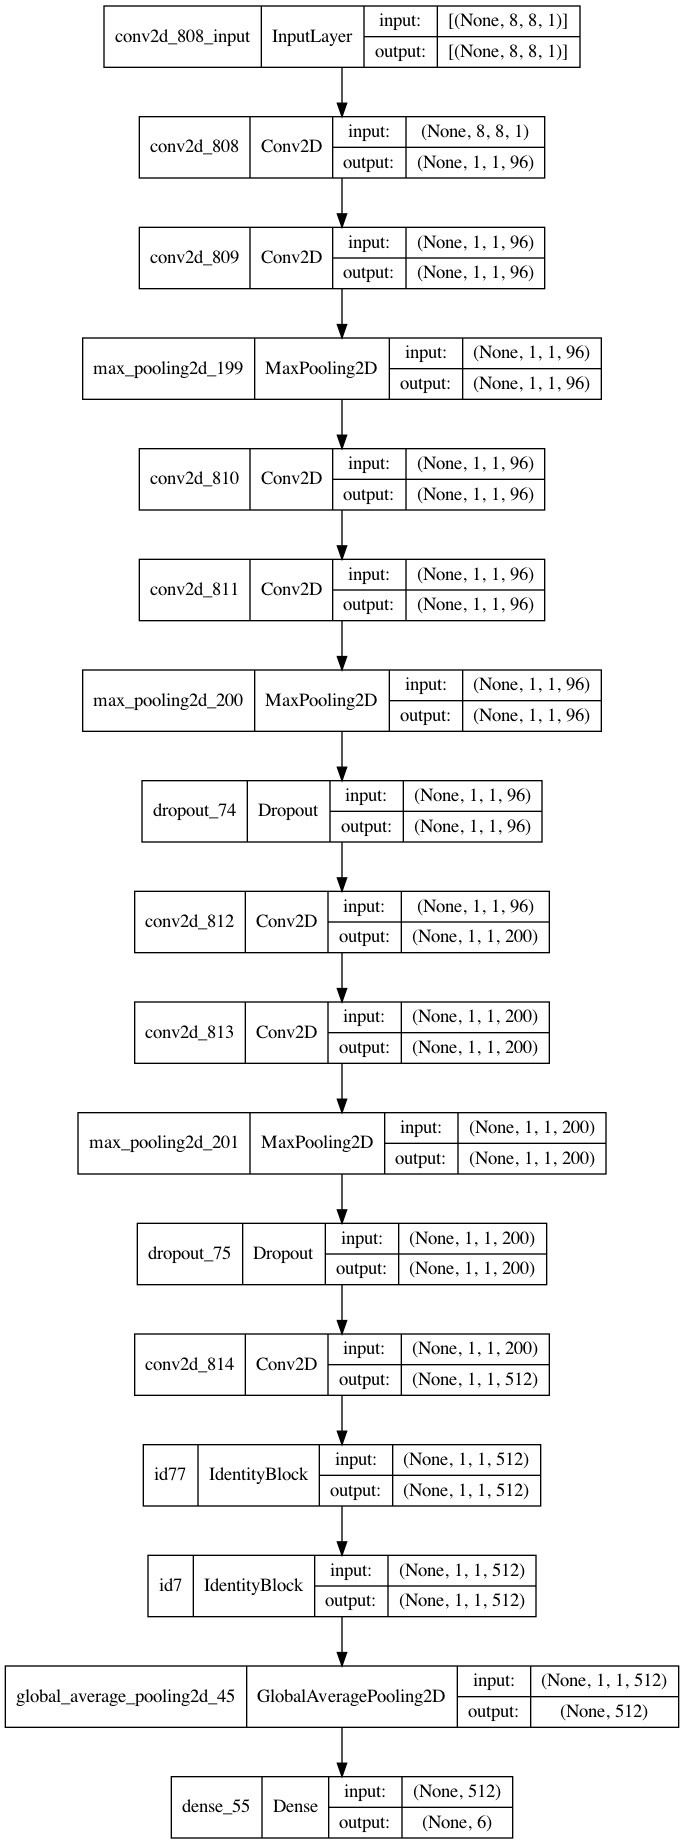

In [391]:
plot_model(nin, 'resnet_model.png', show_shapes = True)

# NIN 모델 만들기 

In [87]:
def NiN():
  # Initialize the model
  model = Sequential()
# #
# # input layer 
# local_input = Input(shape = (image_size, image_size, filter_num+1), name = 'Local_feature_Input')

# # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
# X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(local_input)

# # max-pooling layer: pool_size = (3,3), strides = 2
# X = MaxPooling2D(pool_size = (3,3), padding='same', strides = 2)(X)

# # convolutional layer: filters = 64, strides = 1
# X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

# # convolutional layer: filters = 192, kernel_size = (3,3)
# X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

# # max-pooling layer: pool_size = (3,3), strides = 2
# X = MaxPooling2D(pool_size= (3,3), padding='same', strides = 2)(X)

### 여기까지 stem
  # block 1: 
  model.add(Conv2D(filters = 96, kernel_size = (7,7), strides = 2, activation = 'relu', input_shape = (8, 8, 1)))
  #model.add(MaxPool2D(pool_size = (3,3), strides = (1,1), padding='same'))
  model.add(Conv2D(filters = 96, kernel_size = (1,1), activation = 'relu'))
  #model.add(Conv2D(filters = 96, kernel_size = (2,2),  activation = 'relu'))
  #model.add(MaxPooling2D(pool_size = (3,3), strides = 2))
  model.add(AveragePooling2D(pool_size = (3,3), strides = (1,1), padding='same'))
  # blocks 2-3: 
  # paras includes a sequence of parmaters (filters, kernel_size) 
  paras = [(96, (5,5)), (200, (3,3))]
  for n_filters, kernel_size in paras: 
    model.add(Conv2D(filters = n_filters, kernel_size = (1,1), activation = 'relu'))
    model.add(Conv2D(filters = n_filters, kernel_size = kernel_size, padding = 'same', activation = 'relu'))
    #model.add(Conv2D(filters = n_filters, kernel_size = (1,1), activation = 'relu'))
    #model.add(Conv2D(filters = n_filters, kernel_size = (1,1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1), padding='same'))
  
    model.add(Dropout(0.2))
  # block 4:
  #model.add(Conv2D(filters = 10, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 128, kernel_size = (1,1), activation = 'relu'))
  #model.add(Conv2D(filters = 10, kernel_size = (1,1), activation = 'relu'))
  #model.add(IdentityBlock(10, 3, name = 'id009'))
# # 7th Inception block
  model.add(IdentityBlock(128, 1, name = 'id77'))
  model.add(IdentityBlock(128, 1, name = 'id7'))
    #model.add(Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32,f3_conv5 = 128, f4 = 128))
  # Global Average pooling layer 
  model.add(GlobalAveragePooling2D())
  model.add(Dense(6, activation = 'softmax'))

  # compile the model
  opt = a01
  model.compile(loss = categorical_crossentropy,
                optimizer = opt, 
                metrics = ['accuracy'])
  
  return model

In [88]:
nin = NiN()

NameError: name 'IdentityBlock' is not defined

In [301]:
nin.compile(optimizer = a01,
             #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

epoch_num= 100
if is_global_feature:
    hist = nin.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    nin.evaluate([local_X_train, global_X_train], y_test, verbose = 2)
else:
    hist = nin.fit(local_X_train, y_train, epochs = epoch_num)
    nin.evaluate(local_X_test, y_test, verbose = 2)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

Epoch 1/100
33/33 [==============================] - 3s 64ms/step - loss: 79.8129 - accuracy: 0.2067
Epoch 2/100
33/33 [==============================] - 2s 63ms/step - loss: 1.5797 - accuracy: 0.2381
Epoch 3/100
33/33 [==============================] - 2s 63ms/step - loss: 1.5174 - accuracy: 0.2295
Epoch 4/100
33/33 [==============================] - 2s 63ms/step - loss: 1.5177 - accuracy: 0.2276
Epoch 5/100
33/33 [==============================] - 2s 66ms/step - loss: 1.5151 - accuracy: 0.2229
Epoch 6/100
33/33 [==============================] - 2s 67ms/step - loss: 1.5154 - accuracy: 0.2400
Epoch 7/100
33/33 [==============================] - 2s 65ms/step - loss: 1.5159 - accuracy: 0.2476
Epoch 8/100
33/33 [==============================] - 2s 67ms/step - loss: 1.5137 - accuracy: 0.2419
Epoch 9/100
33/33 [==============================] - 2s 62ms/step - loss: 1.5178 - accuracy: 0.2248
Epoch 10/100
33/33 [==============================] - 2s 62ms/step - loss: 1.5148 - accuracy: 0.236

KeyboardInterrupt: 

In [441]:
nin.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_909 (Conv2D)         (None, 1, 1, 96)          4800      
                                                                 
 conv2d_910 (Conv2D)         (None, 1, 1, 96)          9312      
                                                                 
 average_pooling2d_12 (Avera  (None, 1, 1, 96)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_911 (Conv2D)         (None, 1, 1, 96)          9312      
                                                                 
 conv2d_912 (Conv2D)         (None, 1, 1, 96)          230496    
                                                                 
 max_pooling2d_219 (MaxPooli  (None, 1, 1, 96)         0         
 ng2D)                                               

# resnet 은 Loss 를 어떻게 설정해야 할까???

In [678]:
!pip install jupyterthemes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.2 MB/s eta 0:00:00


In [679]:
!jt -t gruvboxl -TN

# NiN code 8*8 이미지 넣을것!

In [90]:
from keras.layers.core import Activation
def NiN():
  # Initialize the model
  model = Sequential()
#keras.layers.advanced_activations.PReLU(init='zero', weights=None)
  # block 1: 
    #activation code 수정, prelu 로 바꿈
    
  model.add(Conv2D(filters = 96, kernel_size = (8,8), strides = 3, activation = 'relu', input_shape = (8, 8, 1)))
  model.add(Conv2D(filters = 96, kernel_size = (1,1), activation = 'relu' ))
  model.add(Conv2D(filters = 96, kernel_size = (1,1),  activation = 'relu'))
  #model.add(MaxPooling2D(pool_size = (3,3), strides = 2))
  model.add(MaxPool2D(pool_size = (5,5), strides = (2,2), padding='same'))

  # blocks 2-3: 
  # paras includes a sequence of parmaters (filters, kernel_size) 
  paras = [(256, (5,5)), (512, (3,3))]
  for n_filters, kernel_size in paras: 
    model.add(Conv2D(filters = n_filters, kernel_size = kernel_size, padding = 'same', activation = keras.layers.ReLU( weights=None)))
    model.add(Conv2D(filters = n_filters, kernel_size = (1,1),activation = 'relu'))
    model.add(Conv2D(filters = n_filters, kernel_size = (1,1),activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (5,5), strides = (2,2), padding='same'))
#     model.add(Conv2D(filters = n_filters, kernel_size = kernel_size, padding = 'same', activation = keras.layers.ReLU( weights=None)))
#     model.add(Conv2D(filters = n_filters, kernel_size = (1,1),activation = 'relu'))
#     model.add(Conv2D(filters = n_filters, kernel_size = (1,1),activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (3,3), strides = (1,1), padding='same'))
  
  model.add(Dropout(0.5))

  # block 4:
  model.add(Conv2D(filters = 10, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 10, kernel_size = (1,1), activation = keras.layers.PReLU( weights=None),))
  model.add(Conv2D(filters = 10, kernel_size = (1,1), activation = keras.layers.PReLU( weights=None),))


  # Global Average pooling layer 
  model.add(GlobalAveragePooling2D())
  model.add(Dense(1000, activation = 'softmax'))

  # compile the model
  opt = a01
  model.compile(loss = categorical_crossentropy,
                optimizer = opt, 
                metrics = ['accuracy'])
  
  return model


def ResNet(num_classes):
    
    # local_input = Input(shape = (image_size, image_size, filter_num+1), name = 'Local_feature_Input')
    model = Sequential()
    model.add(Conv2D(64, 7, padding='same',input_shape = (32, 32, 1)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPool2D((2,2)))
    model.add(IdentityBlock(64, 1))
    model.add(IdentityBlock(64, 1))
    #self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
    model.add(IdentityBlock(64, 1))
    model.add(IdentityBlock(64, 3))
    model.add(GlobalAveragePooling2D())
    Dense(7, activation='softmax')
    return model

In [94]:
# resnet07
image_size = 8


local_input = Input(shape = (image_size, image_size, filter_num+1), name = 'Local_feature_Input')

x = Conv2D(64, (7,7), activation = 'relu', padding = 'same', name = 'block1_conv1')(local_input)
x = MaxPool2D((3,3), strides = (2,2), name = 'block1_pool')(x)
x = IdentityBlock(64, 1, name = 'id1')(x)
x = IdentityBlock(64, 3, name = 'id2')(x)
# x = IdentityBlock(64, 1, name = 'id3')(x)
# x = IdentityBlock(64, 3, name = 'id4')(x)
# x = IdentityBlock(64, 1, name = 'id5')(x)
# x = IdentityBlock(64, 3, name = 'id6')(x)

# # Local feature + Global feature 사용
if is_global_feature: 
#     # Concatenation block
#     x = Flatten(name = 'flatten')(x)
#     global_input = Input(shape = (len(global_X_train.columns)), name = 'Global feature Input')
#     concat = concatenate([x, global_input], name = 'Feature_concatenation')
    
#     # Final block
# #     x = Dense(1024, activation = 'relu', name = 'fc1')(concat)  # 초기값 4096
    output = GlobalAveragePooling2D()(x)  # 초기값 4096
    prediction = Dense(7, activation = 'softmax', name = 'prediction')(output)
    resnet_model = Model(inputs = [local_input, global_input], outputs = prediction, name = 'resnet_model')


# Local feature만 사용.
else:
    output = GlobalAveragePooling2D()(x)  # 초기값 4096
    prediction = Dense(7, activation = 'softmax', name = 'prediction')(output)  
    resnet_model = Model(inputs = local_input, outputs = prediction, name = 'resnet_model')

    
resnet_model.summary()


# self.id1a = IdentityBlock(64, 3)
# self.id1b = IdentityBlock(64, 3)
# self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
# self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

# #output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096

Model: "resnet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Local_feature_Input (InputL  [(None, 8, 8, 1)]        0         
 ayer)                                                           
                                                                 
 block1_conv1 (Conv2D)       (None, 8, 8, 64)          3200      
                                                                 
 block1_pool (MaxPooling2D)  (None, 3, 3, 64)          0         
                                                                 
 id1 (IdentityBlock)         (None, 3, 3, 64)          8832      
                                                                 
 id2 (IdentityBlock)         (None, 3, 3, 64)          74368     
                                                                 
 global_average_pooling2d_1   (None, 64)               0         
 (GlobalAveragePooling2D)                             

In [95]:
nin = NiN()

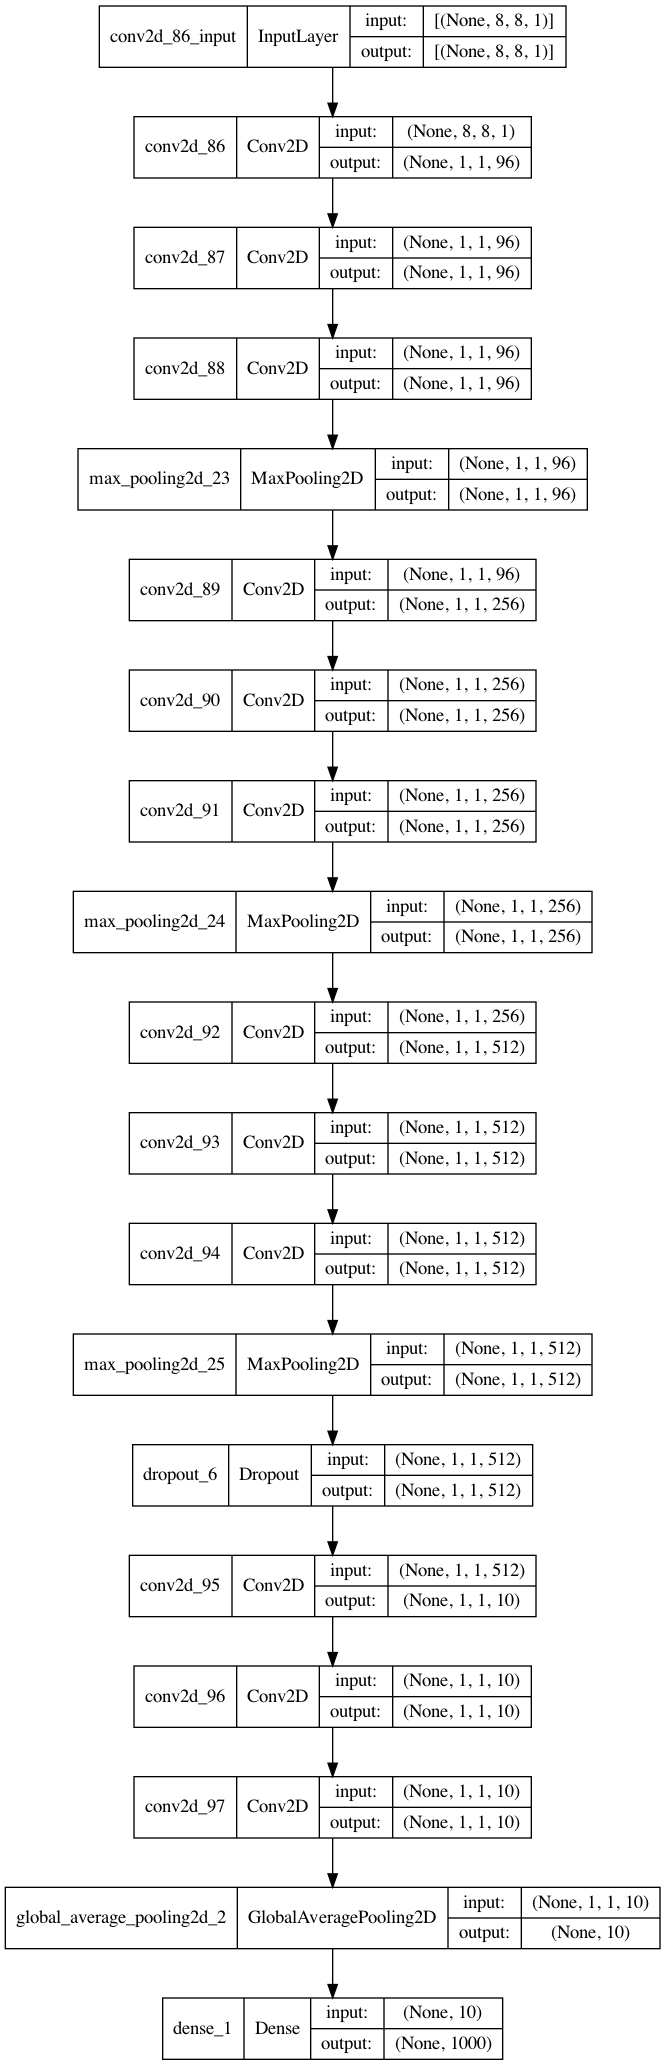

In [96]:
plot_model(nin, 'nin_model.png', show_shapes = True)

In [460]:
from tensorflow.keras import layers

# resnet152 = ResNet(6)
resnet_model.compile(optimizer= a01, loss= 'sparse_categorical_crossentropy',
metrics=['acc'])





Epoch 1/100
33/33 [==============================] - 1s 5ms/step - loss: 0.6285 - accuracy: 0.8733
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0045 - accuracy: 0.9990
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 9.7080e-04 - accuracy: 1.0000
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 0.9990
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 4.7496e-04 - accuracy: 1.0000
Epoch 8/100
33/33 [==============================] - 0s 5ms/step - loss: 8.2547e-04 - accuracy: 1.0000
Epoch 9/100
33/33 [==============================] - 0s 6ms/step - loss: 1.9428e-04 - accuracy: 1.0000
Epoch 10/100
33/33 [==============================] - 0s 6ms/step - loss: 8.2631e-04 - accura

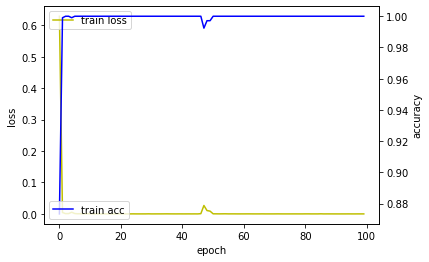

In [302]:
resnet_model.compile(optimizer = a01,
             #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

epoch_num= 100
if is_global_feature:
    hist = resnet_model.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    resnet_model.evaluate([local_X_train, global_X_train], y_test, verbose = 2)
else:
    hist = resnet_model.fit(local_X_train, y_train, epochs = epoch_num)
    resnet_model.evaluate(local_X_test, y_test, verbose = 2)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [89]:
# Identity Block
class IdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size, name):
        super(IdentityBlock, self).__init__(name= name)
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.Activation('relu')
        self.add = tf.keras.layers.Add()
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.add([x, inputs])
        x = self.relu(x)
        return x
 # call 함수를 통해서 computation을 구현합니다. 
 # 계산 마지막 즈음에 inputs이 더해져서 출력이 되고 있는 것을 확인할 수 있습니다.


In [665]:
class ResNet1(tf.keras.Model):
    def __init__(self, num_classes):
        super(ResNet, self).__init__()
        self.conv = tf.keras.layers.Conv2D(64, 7, padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.Activation('relu')
        self.max_pool = tf.keras.layers.MaxPool2D((3, 3))
        self.id1a = IdentityBlock(64, 3)
        self.id1b = IdentityBlock(64, 3)
        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')
    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.id1a(x)
        x = self.id1b(x)
        x = self.global_pool(x)
        return self.classifier(x)

In [41]:
from tensorflow.keras import layers
from tensorflow.keras import activations

In [303]:
g_list = [layer.output for layer in a2.layers]
g_list

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'Local_feature_Input')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'conv2d_98')>,
 <KerasTensor: shape=(None, 2, 2, 64) dtype=float32 (created by layer 'max_pooling2d_26')>,
 <KerasTensor: shape=(None, 2, 2, 64) dtype=float32 (created by layer 'conv2d_99')>,
 <KerasTensor: shape=(None, 2, 2, 64) dtype=float32 (created by layer 'conv2d_100')>,
 <KerasTensor: shape=(None, 1, 1, 64) dtype=float32 (created by layer 'max_pooling2d_27')>,
 <KerasTensor: shape=(None, 1, 1, 48) dtype=float32 (created by layer 'conv2d_102')>,
 <KerasTensor: shape=(None, 1, 1, 16) dtype=float32 (created by layer 'conv2d_104')>,
 <KerasTensor: shape=(None, 1, 1, 64) dtype=float32 (created by layer 'max_pooling2d_28')>,
 <KerasTensor: shape=(None, 1, 1, 32) dtype=float32 (created by layer 'conv2d_101')>,
 <KerasTensor: shape=(None, 1, 1, 64) dtype=float32 (created by layer 'conv2d_103')>,
 <KerasTensor: shape=(None, 1,

In [83]:
Le_features_list = [layer.output for layer in a1.layers]
Le_features_list

[<KerasTensor: shape=(None, 32, 32, 1) dtype=float32 (created by layer 'Local_feature_Input')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 4, 4, 256) dtype=float32 (created by layer 'block3_pool')>,
 <KerasTen

In [304]:
resN_features_list = [layer.output for layer in resnet_model.layers]
resN_features_list

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'Local_feature_Input')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'id1')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'id2')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'global_average_pooling2d_1')>,
 <KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'prediction')>]

In [348]:
NiN_features_list = [layer.output for layer in nin.layers]
NiN_features_list

[<KerasTensor: shape=(None, 2, 2, 32) dtype=float32 (created by layer 'conv2d_769')>,
 <KerasTensor: shape=(None, 2, 2, 32) dtype=float32 (created by layer 'conv2d_770')>,
 <KerasTensor: shape=(None, 2, 2, 32) dtype=float32 (created by layer 'max_pooling2d_190')>,
 <KerasTensor: shape=(None, 2, 2, 32) dtype=float32 (created by layer 'conv2d_771')>,
 <KerasTensor: shape=(None, 2, 2, 32) dtype=float32 (created by layer 'conv2d_772')>,
 <KerasTensor: shape=(None, 2, 2, 32) dtype=float32 (created by layer 'max_pooling2d_191')>,
 <KerasTensor: shape=(None, 2, 2, 32) dtype=float32 (created by layer 'dropout_68')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'conv2d_773')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'conv2d_774')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'max_pooling2d_192')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'dropout_69')>,
 <KerasTensor: shape=(None, 2

In [305]:
g_model = Model(inputs = a2.input, outputs = g_list)

if is_global_feature == True:
    g__features = g_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = g_model([local_X_test, global_X_test])
    val_modified_VGG16_extracted_features = g_model([local_X_val, global_X_val])
else: 
    g__features = g_model(local_X_train)
    test_modified_VGG16_extracted_features = g_model(local_X_test)
    val_modified_VGG16_extracted_features = g_model(local_X_val)

In [84]:
Le_model = Model(inputs = a1.input, outputs = Le_features_list)

if is_global_feature == True:
    Le__features = Le_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = Le_model([local_X_test, global_X_test])
    val_modified_VGG16_extracted_features = Le_model([local_X_val, global_X_val])
else: 
    Le__features = Le_model(local_X_train)
    test_modified_VGG16_extracted_features = Le_model(local_X_test)
    val_modified_VGG16_extracted_features = Le_model(local_X_val)

In [85]:
len(Le__features)

13

In [306]:
resN_feat_extraction_model = Model(inputs = resnet_model.input, outputs = resN_features_list)

if is_global_feature == True:
    res__features = resN_feat_extraction_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = resN_feat_extraction_model([local_X_test, global_X_test])
    val_modified_VGG16_extracted_features = resN_feat_extraction_model([local_X_val, global_X_val])
else: 
    res__features = resN_feat_extraction_model(local_X_train)
    test_modified_VGG16_extracted_features = resN_feat_extraction_model(local_X_test)
    val_modified_VGG16_extracted_features = resN_feat_extraction_model(local_X_val)

In [149]:
len(res__features)

7

In [732]:
# adam 이용 코드 
from keras.layers.advanced_activations import PReLU

Epoch 1/30
20/20 [==============================] - 1s 30ms/step - loss: 1.7889 - accuracy: 0.1873
Epoch 2/30
20/20 [==============================] - 1s 29ms/step - loss: 1.7889 - accuracy: 0.1873
Epoch 3/30
20/20 [==============================] - 1s 29ms/step - loss: 1.7889 - accuracy: 0.1873
Epoch 4/30
20/20 [==============================] - 1s 30ms/step - loss: 1.7888 - accuracy: 0.1873
Epoch 5/30
20/20 [==============================] - 1s 30ms/step - loss: 1.7889 - accuracy: 0.1873
Epoch 6/30
20/20 [==============================] - 1s 29ms/step - loss: 1.7888 - accuracy: 0.1873
Epoch 7/30
20/20 [==============================] - 1s 29ms/step - loss: 1.7889 - accuracy: 0.1873
Epoch 8/30
20/20 [==============================] - 1s 29ms/step - loss: 1.7888 - accuracy: 0.1873
Epoch 9/30
20/20 [==============================] - 1s 30ms/step - loss: 1.7888 - accuracy: 0.1873
Epoch 10/30
20/20 [==============================] - 1s 29ms/step - loss: 1.7888 - accuracy: 0.1873
Epoch 11/

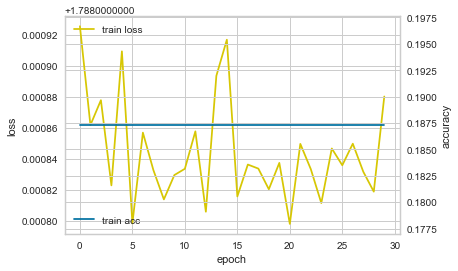

In [380]:
#https://stackoverflow.com/questions/50056356/could-not-interpret-optimizer-identifier-error-in-kerasimport tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
#from keras.optimizers import adam
import sys
import os 
# from keras_adamw import AdamW
from keras import backend as K
# sys.path.append(os.pardir)
# from keras_optimizers import AdamW
#from keras_adamw import AdamW
#from keras_adamw.optimizers import AdamW
#from tensorflow.python.keras.optimizers import Adam
#from keras_radam import RAdam
#from keras.optimizers import adam
from tensorflow_addons.optimizers import AdamW#weight_decay 씀
from tensorflow.python.keras.metrics import Metric
from tensorflow.python.ops import math_ops

# optimizer = AdamW(lr=1e-4,
#                   model=model,
#                   lr_multipliers=lr_multipliers,
#                   use_cosine_annealing=True,
#                   total_iterations=24)


a01 = AdamW(learning_rate =0.001, beta_1=0.9, beta_2 = 0.999,amsgrad = True,\
                   #model = None,
                   #use_cosine_annealing = True,
                   #zero_penalties = 1,
                   #lr_multipliers = None,
                   #autorestart = 1,
                   #eta_min = 0.2,
                   #eta_max = 0.9,
                   #t_cur = 2,
                   weight_decay = 2.5e-4,
                   #weight_decays=0.1,
                   #total_iterations = 3,
                   #init_verbose = 1,
                   epsilon = 1e-07,
                   
                 )



a1.compile(optimizer = 'adam',
             #loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

epoch_num= 30

if is_global_feature:
    hist = a1.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    a1.evaluate([local_X_train, global_X_train], y_test, verbose = 2)
else:
    hist = a1.fit(local_X_train, y_train, epochs = epoch_num)
    a1.evaluate(local_X_test, y_test, verbose = 2)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


Epoch 1/30
20/20 [==============================] - 1s 34ms/step - loss: 0.0881 - accuracy: 0.9857
Epoch 2/30
20/20 [==============================] - 1s 34ms/step - loss: 0.0395 - accuracy: 0.9841
Epoch 3/30
20/20 [==============================] - 1s 34ms/step - loss: 0.0357 - accuracy: 0.9905
Epoch 4/30
20/20 [==============================] - 1s 35ms/step - loss: 0.0270 - accuracy: 0.9889
Epoch 5/30
20/20 [==============================] - 1s 35ms/step - loss: 0.0285 - accuracy: 0.9857
Epoch 6/30
20/20 [==============================] - 1s 34ms/step - loss: 0.3479 - accuracy: 0.9365
Epoch 7/30
20/20 [==============================] - 1s 35ms/step - loss: 0.2008 - accuracy: 0.9635
Epoch 8/30
20/20 [==============================] - 1s 35ms/step - loss: 0.0182 - accuracy: 0.9921
Epoch 9/30
20/20 [==============================] - 1s 34ms/step - loss: 0.0102 - accuracy: 0.9952
Epoch 10/30
20/20 [==============================] - 1s 35ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 11/

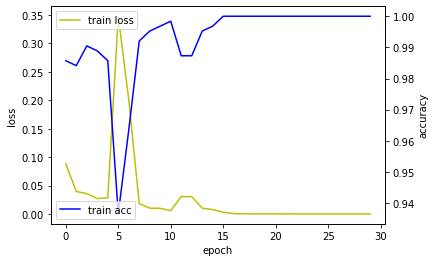

In [34]:
# 모델 학습
a1.compile(optimizer = a01,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

if is_global_feature:
    hist = a1.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    a1.evaluate([local_X_test, global_X_test], y_test, verbose = 2)
else:
    hist = a1.fit(local_X_train, y_train, epochs = epoch_num)
    a1.evaluate(local_X_test, y_test, verbose = 2)
    
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [128]:
print(hist.history['loss'])
print('-'*90)
print(hist.history['accuracy'])

[1.8644089698791504, 0.5720900893211365, 0.28263357281684875, 0.27712294459342957, 0.28729578852653503, 0.12870503962039948, 0.09294475615024567, 0.10992292314767838, 0.0951547846198082, 0.058203402906656265, 0.06750206649303436, 0.04563308507204056, 0.046740539371967316, 0.03688580170273781, 0.03620496392250061, 0.03710255026817322, 0.03534084931015968, 0.05635380372405052, 0.06826937943696976, 0.04473312944173813, 0.03963251784443855, 0.054389409720897675, 0.03773058205842972, 0.033620934933423996, 0.033596739172935486, 0.03219160810112953, 0.022091057151556015, 0.03867962583899498, 0.029897021129727364, 0.055118028074502945]
------------------------------------------------------------------------------------------
[0.5523809790611267, 0.8047618865966797, 0.8333333134651184, 0.8761904835700989, 0.9047619104385376, 0.9555555582046509, 0.958730161190033, 0.9666666388511658, 0.9523809552192688, 0.976190447807312, 0.9777777791023254, 0.9841269850730896, 0.9793650507926941, 0.985714256763

In [42]:

print(tf.__version__)

2.6.0


In [68]:
Le__features_list = [layer.output for layer in a2.layers]
Le__features_list

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'Local_feature_Input')>,
 <KerasTensor: shape=(None, 3, 3, 64) dtype=float32 (created by layer 'conv2d_42')>,
 <KerasTensor: shape=(None, 2, 2, 64) dtype=float32 (created by layer 'max_pooling2d_12')>,
 <KerasTensor: shape=(None, 2, 2, 64) dtype=float32 (created by layer 'conv2d_43')>,
 <KerasTensor: shape=(None, 2, 2, 64) dtype=float32 (created by layer 'conv2d_44')>,
 <KerasTensor: shape=(None, 1, 1, 64) dtype=float32 (created by layer 'max_pooling2d_13')>,
 <KerasTensor: shape=(None, 1, 1, 48) dtype=float32 (created by layer 'conv2d_46')>,
 <KerasTensor: shape=(None, 1, 1, 16) dtype=float32 (created by layer 'conv2d_48')>,
 <KerasTensor: shape=(None, 1, 1, 64) dtype=float32 (created by layer 'max_pooling2d_14')>,
 <KerasTensor: shape=(None, 1, 1, 32) dtype=float32 (created by layer 'conv2d_45')>,
 <KerasTensor: shape=(None, 1, 1, 64) dtype=float32 (created by layer 'conv2d_47')>,
 <KerasTensor: shape=(None, 1, 1, 3

In [140]:
modified_VGG16_feat_extraction_model = Model(inputs = a2.input, outputs = Le__features_list)

if is_global_feature == True:
    Le_features = modified_VGG16_feat_extraction_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_test, global_X_test])
    val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_val, global_X_val])
else: 
    Le_features = modified_VGG16_feat_extraction_model(local_X_train)
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_test)
    val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_val)

# vgg representation vector

In [305]:
modified_VGG16_features_list = [layer.output for layer in a1.layers]
modified_VGG16_features_list

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'Local_feature_Input')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 4, 4, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 1, 1, 256) dtype=float32 (created by layer 'block3_pool')>,
 <KerasTensor: shape=(

In [308]:
modified_VGG16_feat_extraction_model = Model(inputs = a1.input, outputs = modified_VGG16_features_list)

if is_global_feature == True:
    p_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_test, global_X_test])
    val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_val, global_X_val])
else: 
    p_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_train)
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_test)
    val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_val)

In [307]:
Le_representations = np.array(Le_features[-2], dtype = object)
test_modified_VGG16_representations = np.array(test_modified_VGG16_extracted_features[-2], dtype = object)
val_modified_VGG16_representations = np.array(val_modified_VGG16_extracted_features[-2], dtype = object)

In [308]:
Le_representations

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [6.850744724273682, 0.0, 19.550804138183594, ...,
        16.77971076965332, 0.0, 0.0],
       [6.371204853057861, 0.0, 18.345600128173828, ...,
        15.790361404418945, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [16.223217010498047, 10.33369255065918, 8.538623809814453, ...,
        0.0, 0.0, 0.0],
       [1.6633636951446533, 0.0, 0.0, ..., 0.3888692557811737, 0.0, 0.0]],
      dtype=object)

# resnet representaiton vector 추출

In [309]:
res_representations = np.array(res__features[-2], dtype = object)
test_modified_VGG16_representations = np.array(test_modified_VGG16_extracted_features[-2], dtype = object)
val_modified_VGG16_representations = np.array(val_modified_VGG16_extracted_features[-2], dtype = object)

In [310]:
res_representations

array([[1.112128734588623, 0.29157939553260803, 0.10956701636314392, ...,
        0.0, 0.09016594290733337, 2.0381343364715576],
       [1.0126700401306152, 0.652198314666748, 0.13716544210910797, ...,
        0.02681816555559635, 0.010374333709478378, 3.0786924362182617],
       [1.0243163108825684, 0.5968528985977173, 0.13612228631973267, ...,
        0.02161976508796215, 0.011750804260373116, 3.01011323928833],
       ...,
       [2.30833101272583, 0.0, 0.09864351153373718, ..., 0.0,
        0.008681509643793106, 0.5875843167304993],
       [1.8997571468353271, 0.0, 0.088133305311203, ..., 0.0,
        0.02938293106853962, 0.5006340742111206],
       [1.85174560546875, 0.0, 0.05249137058854103, ..., 0.0,
        0.071114182472229, 0.37147632241249084]], dtype=object)

# nin model

In [442]:
modified_VGG16_features_list = [layer.output for layer in nin.layers]
modified_VGG16_features_list

[<KerasTensor: shape=(None, 1, 1, 96) dtype=float32 (created by layer 'conv2d_909')>,
 <KerasTensor: shape=(None, 1, 1, 96) dtype=float32 (created by layer 'conv2d_910')>,
 <KerasTensor: shape=(None, 1, 1, 96) dtype=float32 (created by layer 'average_pooling2d_12')>,
 <KerasTensor: shape=(None, 1, 1, 96) dtype=float32 (created by layer 'conv2d_911')>,
 <KerasTensor: shape=(None, 1, 1, 96) dtype=float32 (created by layer 'conv2d_912')>,
 <KerasTensor: shape=(None, 1, 1, 96) dtype=float32 (created by layer 'max_pooling2d_219')>,
 <KerasTensor: shape=(None, 1, 1, 96) dtype=float32 (created by layer 'dropout_92')>,
 <KerasTensor: shape=(None, 1, 1, 200) dtype=float32 (created by layer 'conv2d_913')>,
 <KerasTensor: shape=(None, 1, 1, 200) dtype=float32 (created by layer 'conv2d_914')>,
 <KerasTensor: shape=(None, 1, 1, 200) dtype=float32 (created by layer 'max_pooling2d_220')>,
 <KerasTensor: shape=(None, 1, 1, 200) dtype=float32 (created by layer 'dropout_93')>,
 <KerasTensor: shape=(None

In [443]:
modified_VGG16_feat_extraction_model = Model(inputs = nin.input, outputs = modified_VGG16_features_list)

if is_global_feature == True:
    nin_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_test, global_X_test])
    val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_val, global_X_val])
else: 
    nin_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_train)
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_test)
    val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_val)

In [444]:
nin_modified_VGG16_representations = np.array(nin_modified_VGG16_extracted_features[-2], dtype = object)
test_modified_VGG16_representations = np.array(test_modified_VGG16_extracted_features[-2], dtype = object)
val_modified_VGG16_representations = np.array(val_modified_VGG16_extracted_features[-2], dtype = object)

In [445]:
nin_modified_VGG16_representations

array([[0.0, 0.0, 0.08401083946228027, ..., 2.6145541667938232, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 23.060749053955078, 0.0, 0.0],
       [0.10799947381019592, 31.544849395751953, 18.442520141601562, ...,
        0.0, 0.03161388635635376, 0.10461944341659546],
       ...,
       [0.0, 13.425674438476562, 0.016813218593597412, ..., 0.0, 0.0,
        0.239442378282547],
       [0.0, 9.233532905578613, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 38.0667724609375, 0.0, ..., 0.0, 0.0, 5.77351713180542]],
      dtype=object)

In [42]:
g_representations = np.array(g__features[-2], dtype = object)
test_modified_VGG16_representations = np.array(g__features[-2], dtype = object)
val_modified_VGG16_representations = np.array(g__features[-2], dtype = object)

In [367]:
train_modified_VGG16_representations.shape

(630, 10)

## (2) 분류 예측

# 여기서 부터 시각화(kmeans)

In [257]:
max_train_modified_VGG16_representations = np.max(train_modified_VGG16_representations)
max_train_modified_VGG16_representations

2868.134765625

In [258]:
min_train_modified_VGG16_representations = np.min(train_modified_VGG16_representations)
min_train_modified_VGG16_representations

-3.0951688289642334

In [259]:
train_modified_VGG16_representations.shape

(630, 10)

# 이거하고있음


In [43]:
#resnet kmeans

kmeans_g = KMeans(n_clusters = 5)

kmeans_g.fit(g_representations)#representation vector 를 클러스터링

print(type(kmeans_g.labels_))
print(np.shape(kmeans_g.labels_))
print(np.unique(kmeans_g.labels_))

<class 'numpy.ndarray'>
(630,)
[0 1 2 3 4]


In [311]:
#resnet kmeans

kmeans_le = KMeans(n_clusters = 5)

kmeans_le.fit(Le_representations)#representation vector 를 클러스터링

print(type(kmeans_le.labels_))
print(np.shape(kmeans_le.labels_))
print(np.unique(kmeans_le.labels_))

<class 'numpy.ndarray'>
(211,)
[0 1 2 3 4]


# nin representation vector

In [446]:
#resnet kmeans

kmeans_res = KMeans(n_clusters = 5)

kmeans_res.fit(nin_modified_VGG16_representations)#representation vector 를 클러스터링

print(type(kmeans_res.labels_))
print(np.shape(kmeans_res.labels_))
print(np.unique(kmeans_res.labels_))

<class 'numpy.ndarray'>
(630,)
[0 1 2 3 4]


In [152]:
kmeans_cluster1 = KMeans(n_clusters = 5)

kmeans_cluster1.fit(res_representations)#representation vector 를 클러스터링

print(type(kmeans_cluster1.labels_))
print(np.shape(kmeans_cluster1.labels_))
print(np.unique(kmeans_cluster1.labels_))

<class 'numpy.ndarray'>
(211,)
[0 1 2 3 4]


/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


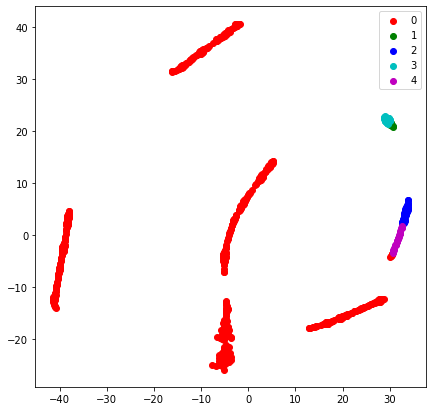

In [46]:
from sklearn.manifold import TSNE

# T-SNE로 차원축소해서 이미지들 사이의 representation에 차이가 있는지 확인해본다
g = TSNE(n_components=2).fit_transform(g_representations)

target_ids = range(0,5)

plt.figure(figsize=(7, 7))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(g[kmeans_g.labels_ == i, 0], g[kmeans_g.labels_== i, 1], c=c, label=label)
plt.legend()
plt.show()

/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


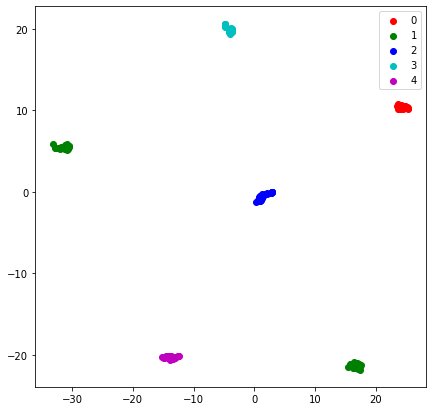

In [103]:
from sklearn.manifold import TSNE

# T-SNE로 차원축소해서 이미지들 사이의 representation에 차이가 있는지 확인해본다
le = TSNE(n_components=2).fit_transform(res_representations)

target_ids = range(0,5)

plt.figure(figsize=(7, 7))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(le[kmeans_cluster1.labels_ == i, 0], le[kmeans_cluster1.labels_== i, 1], c=c, label=label)
plt.legend()
plt.show()

/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


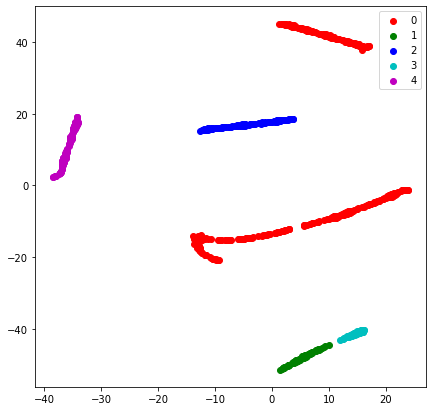

In [447]:
from sklearn.manifold import TSNE

# T-SNE로 차원축소해서 이미지들 사이의 representation에 차이가 있는지 확인해본다
le = TSNE(n_components=2).fit_transform(nin_modified_VGG16_representations)

target_ids = range(0,5)

plt.figure(figsize=(7, 7))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(le[kmeans_res.labels_ == i, 0], le[kmeans_res.labels_== i, 1], c=c, label=label)
plt.legend()
plt.show()

/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


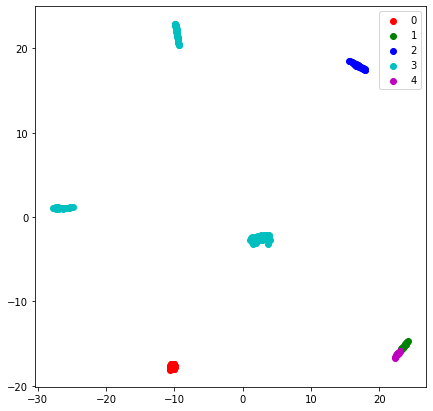

In [312]:
from sklearn.manifold import TSNE

# T-SNE로 차원축소해서 이미지들 사이의 representation에 차이가 있는지 확인해본다
le = TSNE(n_components=2).fit_transform(Le_representations)

target_ids = range(0,5)

plt.figure(figsize=(7, 7))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(le[kmeans_le.labels_ == i, 0], le[kmeans_le.labels_== i, 1], c=c, label=label)
plt.legend()
plt.show()

/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


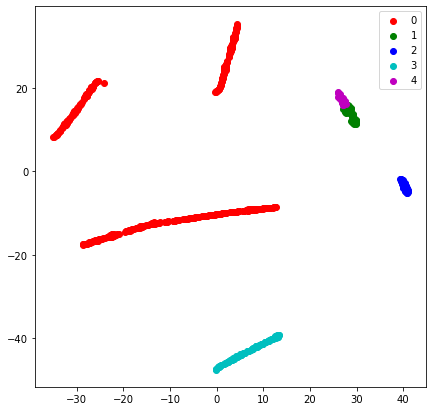

In [416]:
from sklearn.manifold import TSNE

# T-SNE로 차원축소해서 이미지들 사이의 representation에 차이가 있는지 확인해본다
x_embedded_final_1 = TSNE(n_components=2).fit_transform(nin_modified_VGG16_representations)

target_ids = range(0,5)

plt.figure(figsize=(7, 7))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(x_embedded_final_1[kmeans_res.labels_ == i, 0], x_embedded_final_1[kmeans_res.labels_== i, 1], c=c, label=label)
plt.legend()
plt.show()

In [321]:
# representation 벡터 형태 변환
train_df = pd.DataFrame(res_representations)

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

df_y = np.array(y_train)
df_y = pd.DataFrame(df_y)
tsne_df['target'] = pd.DataFrame(df_y)
# # class target 정보 불러오기 
# tsne_df['target'] = df['target']

# # target 별 분리
# tsne_df_0 = tsne_df[tsne_df['target'] == 0]
# tsne_df_1 = tsne_df[tsne_df['target'] == 1]
# tsne_df_2 = tsne_df[tsne_df['target'] == 2]
# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]
tsne_df_6 = tsne_df[tsne_df['target'] == 6]

/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


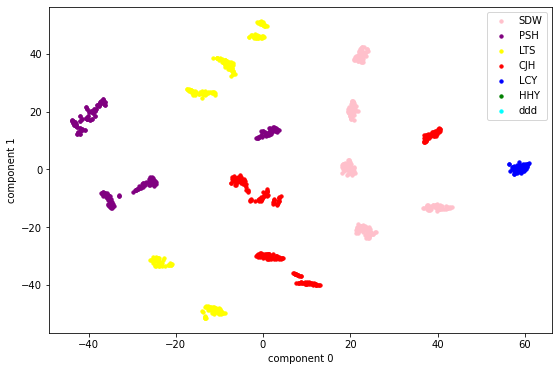

<Figure size 432x288 with 0 Axes>

In [322]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
# ax = fig.add_subplot(111, projection='2d')
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'],s=11, color = 'pink', label = 'SDW')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'],s=11, color = 'purple', label = 'PSH')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'],s=11, color = 'yellow', label = 'LTS')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'],s=11, color = 'red', label = 'CJH')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'],s=11, color = 'blue', label = 'LCY')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'],s=11, color = 'green', label = 'HHY')
plt.scatter(tsne_df_6['component 0'], tsne_df_6['component 1'],s=11, color = 'cyan', label = 'ddd')
plt.xlabel('component 0')
plt.ylabel('component 1')

plt.legend()
plt.show()
plt.savefig('tsne_sample.png')

In [315]:
# representation 벡터 형태 변환
train_df = pd.DataFrame(Le_representations)

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

df_y = np.array(y_train)
df_y = pd.DataFrame(df_y)
tsne_df['target'] = pd.DataFrame(df_y)
# # class target 정보 불러오기 
# tsne_df['target'] = df['target']

# # target 별 분리
# tsne_df_0 = tsne_df[tsne_df['target'] == 0]
# tsne_df_1 = tsne_df[tsne_df['target'] == 1]
# tsne_df_2 = tsne_df[tsne_df['target'] == 2]
# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]

/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [319]:
# representation 벡터 형태 변환
train_df = pd.DataFrame(Le_representations)

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

df_y = np.array(y_train)
df_y = pd.DataFrame(df_y)
tsne_df['target'] = pd.DataFrame(df_y)
# # class target 정보 불러오기 
# tsne_df['target'] = df['target']

# # target 별 분리
# tsne_df_0 = tsne_df[tsne_df['target'] == 0]
# tsne_df_1 = tsne_df[tsne_df['target'] == 1]
# tsne_df_2 = tsne_df[tsne_df['target'] == 2]
# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]
tsne_df_6 = tsne_df[tsne_df['target'] == 6]

/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


AttributeError: 'Axes3DSubplot' object has no attribute 'xlabel'

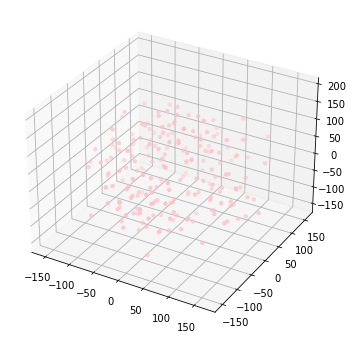

In [320]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'],s=11, color = 'pink', label = 'SDW')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'],s=11, color = 'purple', label = 'PSH')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'],s=11, color = 'yellow', label = 'LTS')
ax.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], tsne_df_3['component 2'],s=11, color = 'red', label = 'CJH')
ax.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], tsne_df_4['component 2'],s=11, color = 'blue', label = 'LCY')
ax.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], tsne_df_5['component 2'],s=11, color = 'green', label = 'HHY')
ax.scatter(tsne_df_6['component 0'], tsne_df_6['component 1'], tsne_df_6['component 2'],s=11, color = 'cyan', label = 'ddd')
ax.xlabel('component 0')
ax.ylabel('component 1')
ax.zlabel('component 2')
ax.legend()
ax.show()
plt.savefig('tsne_sample.png')

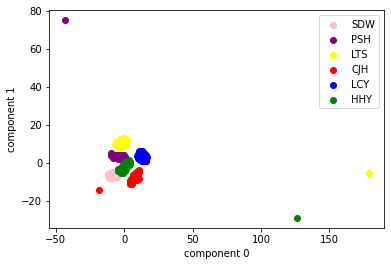

<Figure size 432x288 with 0 Axes>

In [472]:
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'SDW')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'PSH')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'LTS')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'red', label = 'CJH')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'blue', label = 'LCY')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'green', label = 'HHY')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()
plt.savefig('tsne_sample.png')


/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/parksunghun/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


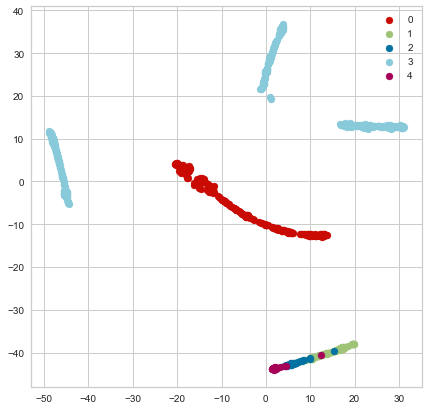

In [383]:
from sklearn.manifold import TSNE

# T-SNE로 차원축소해서 이미지들 사이의 representation에 차이가 있는지 확인해본다
x_embedded_final_1 = TSNE(n_components=2).fit_transform(p_modified_VGG16_representations)

target_ids = range(0,5)

plt.figure(figsize=(7, 7))
colors = 'r', 'g', 'b', 'c', 'm'
for i, c, label in zip(target_ids, colors, target_ids):
    plt.scatter(x_embedded_final_1[kmeans_cluster.labels_ == i, 0], x_embedded_final_1[kmeans_cluster.labels_== i, 1], c=c, label=label)
plt.legend()
plt.show()

In [289]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.1 MB/s eta 0:00:00a 0:00:01


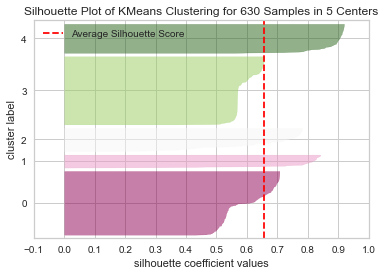

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 630 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [446]:

from yellowbrick.cluster import SilhouetteVisualizer

#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans_nin, colors='PiYG')

#생성된 visualizer에 데이터 입력 
visualizer_2.fit(nin_modified_VGG16_representations)      
visualizer_2.show()

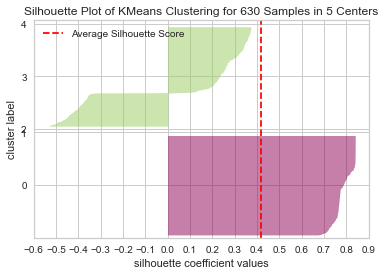

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 630 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [458]:

from yellowbrick.cluster import SilhouetteVisualizer

#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans_cluster, colors='PiYG')

#생성된 visualizer에 데이터 입력 
visualizer_2.fit(train_modified_VGG16_representations)      
visualizer_2.show()

In [263]:
cluster_sub_points1 = train_modified_VGG16_representations[kmeans_cluster.labels_ == 1]

In [264]:
cluster_sub_points1.shape

(23, 10)

In [265]:
cluster_sub_points2 = train_modified_VGG16_representations[kmeans_cluster.labels_ == 2]

In [266]:
cluster_sub_points2.shape

(38, 10)

In [267]:
cluster_sub_points3 = train_modified_VGG16_representations[kmeans_cluster.labels_ == 3]

In [268]:
cluster_sub_points3.shape

(194, 10)

In [270]:
cluster_sub_points4 = train_modified_VGG16_representations[kmeans_cluster.labels_ == 4]

In [271]:
cluster_sub_points4.shape

(56, 10)

In [272]:
for cluster in range(11):
    cluster_points = train_modified_VGG16_representations[kmeans_cluster.labels_ == cluster]
    print(cluster_points.shape)

(319, 10)
(23, 10)
(38, 10)
(194, 10)
(56, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)
(0, 10)


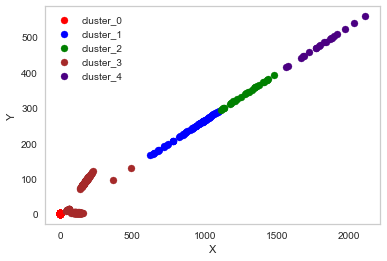

In [339]:
# 결과 시각화
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo', 5: 'k'}

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    cluster_sub_points = train_modified_VGG16_representations[kmeans_cluster.labels_ == cluster]
    
    # 해당 sub data를 plot합니다.
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1],    # X축 좌표, Y축 좌표
              c=color_dict[cluster], label = 'cluster_{}'.format(cluster))
    
    # 축 이름을 라벨에 달고, 점 데이터 그리기
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid()

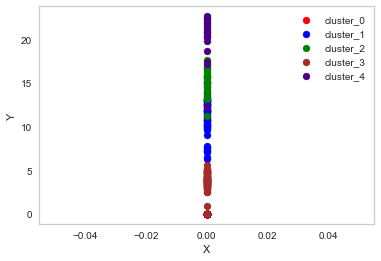

In [340]:
# 결과 시각화
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo', 5: 'k'}

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    cluster_sub_points = p_modified_VGG16_representations[kmeans_cluster.labels_ == cluster]
    
    # 해당 sub data를 plot합니다.
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1],    # X축 좌표, Y축 좌표
              c=color_dict[cluster], label = 'cluster_{}'.format(cluster))
    
    # 축 이름을 라벨에 달고, 점 데이터 그리기
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid()

In [242]:
kmeans_cluster.labels_

array([1, 4, 0, 3, 3, 0, 0, 2, 2, 3, 2, 1, 2, 2, 1, 3, 0, 0, 1, 4, 2, 0,
       0, 2, 2, 1, 1, 4, 1, 4, 2, 3, 0, 3, 3, 1, 4, 0, 2, 3, 4, 0, 3, 1,
       0, 0, 0, 1, 4, 0, 2, 1, 2, 2, 1, 4, 3, 3, 1, 4, 2, 1, 4, 1, 0, 1,
       3, 2, 1, 0, 1, 2, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 0, 1, 4,
       3, 1, 4, 1, 1, 2, 0, 1, 4, 0, 4, 3, 3, 0, 4, 2, 3, 3, 4, 3, 0, 4,
       0, 1, 3, 1, 0, 1, 2, 3, 4, 1, 4, 2, 0, 3, 4, 0, 3, 2, 0, 4, 1, 1,
       4, 1, 4, 3, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 3, 2, 1, 1, 2, 2, 1, 1,
       4, 3, 4, 2, 3, 0, 3, 4, 4, 3, 3, 2, 4, 1, 4, 3, 0, 1, 1, 4, 0, 1,
       2, 2, 1, 4, 1, 2, 4, 2, 1, 0, 4, 4, 1, 1, 1, 1, 1, 0, 1, 1, 3, 0,
       3, 0, 0, 4, 3, 1, 1, 1, 3, 4, 2, 3, 1, 3, 2, 3, 4, 3, 1, 4, 2, 1,
       0, 1, 1, 4, 0, 0, 0, 3, 3, 0, 0, 0, 1, 4, 1, 3, 2, 4, 0, 3, 1, 0,
       0, 4, 1, 2, 1, 3, 4, 2, 3, 0, 0, 2, 1, 1, 4, 4, 1, 0, 0, 3, 1, 3,
       1, 0, 2, 0, 1, 4, 0, 0, 2, 2, 1, 3, 1, 4, 1, 3, 3, 4, 2, 1, 3, 4,
       2, 4, 1, 3, 2, 4, 0, 4, 1, 1, 3, 4, 3, 3, 2,

In [33]:
cluster_sub_points[:,1]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
      dtype=object)

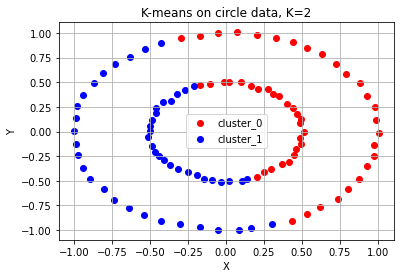

In [34]:
from sklearn.datasets import make_circles

# 원형 분포데이터
# 원형 분포를 가지는 점 데이터 100개를 생성합니다.
circle_points, circle_labels = make_circles(n_samples = 100,
                                           factor = 0.5, noise = 0.01)

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 원형 분포에 대해 K-menas 수행
circle_kmeans = KMeans(n_clusters = 2)
circle_kmeans.fit(circle_points)
color_dict = {0:'red', 1:'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1],
              c = color_dict[cluster], label = 'cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

No handles with labels found to put in legend.


# of cluster: 30
DBSCAN Y-hat: [22  0  1  2  0 -1 20 -1 -1 -1 -1  2 18 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  2
 -1 -1 -1  3  2 -1 -1 -1  4  5 -1  6 -1 -1 -1 -1 19  2 -1 -1 -1  7 -1  8
 -1  2  2  9 -1 -1 -1  2  2 -1 10 -1 -1  2 24 -1 -1 -1 -1 11 -1 -1 -1 -1
 -1 -1 -1  2 -1 -1 20 -1  9  9 -1  5 -1 -1 12 -1  2 -1 -1 -1 -1 -1 -1 29
 -1 -1 11 -1 -1 12 -1 -1  2 -1 -1 -1 -1 -1  0 -1 -1 -1  9 -1 -1 -1  7  2
  2 10 -1  2 10 -1  2 -1 -1 -1  2 13 -1 -1  2 -1 -1 -1  5 14 -1 -1 15 -1
 -1 -1  5  2 13  5 13 -1 -1  3 16 -1  6 14 -1  2  2  6 -1  5 -1  8 -1 -1
  1  5 -1  8  5  2 -1 -1 -1  2 -1 -1 -1 17 -1 -1  2  7 -1 -1 -1 -1 28 13
 -1 -1 -1  5 -1 -1 -1 -1 27 -1 -1 -1 -1 -1 25  2 -1 -1 -1 -1 -1  2 -1 -1
 -1 18  2 -1 19 -1 -1 -1  3 -1 -1 -1 -1 13  2 -1 -1  0  0 -1  5 -1  0 -1
 -1 -1 -1 20  2 13 -1 -1 -1 -1 19 -1 -1 -1 -1  9 -1 -1 -1 -1 11 -1 -1 -1
 13  2 20 -1 -1  5 -1 -1 -1 -1 13  2 -1 -1 -1 -1  4 18 -1  2 -1  5 21 29
 18 -1 22  2  5 17  5 -1 23 21 -1 -1 -1 -1  0 -1 -1  9  2 21  2 -1  2  3
 -1 -1 -1 -1 -1 -1  

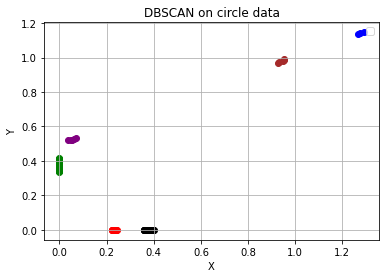

In [35]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple', 5:'k'} 

# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3   # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps = epsilon, min_samples = minPts)   # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
# circle_dbscan.fit(circle_points)    # 3) ~ 5) 과정을 반복
circle_dbscan.fit(train_modified_VGG16_representations) 
n_cluster = max(circle_dbscan.labels_)+1       # 3) ~5) 과정의 반복으로 클러스터의 수 도출
# n_cluster = max(circle_dbscan.labels_)+1       # 3) ~5) 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(6):
# for cluster in range(n_cluster):
    cluster_sub_points = train_modified_VGG16_representations[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], 
               c= color_dict[cluster], 
#                label = 'cluster_{}'.format(cluster)
              )

ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

In [36]:
circle_dbscan.labels_

array([22,  0,  1,  2,  0, -1, 20, -1, -1, -1, -1,  2, 18, -1, -1, -1,  2,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,  3,  2, -1, -1, -1,  4,  5,
       -1,  6, -1, -1, -1, -1, 19,  2, -1, -1, -1,  7, -1,  8, -1,  2,  2,
        9, -1, -1, -1,  2,  2, -1, 10, -1, -1,  2, 24, -1, -1, -1, -1, 11,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, 20, -1,  9,  9, -1,  5, -1,
       -1, 12, -1,  2, -1, -1, -1, -1, -1, -1, 29, -1, -1, 11, -1, -1, 12,
       -1, -1,  2, -1, -1, -1, -1, -1,  0, -1, -1, -1,  9, -1, -1, -1,  7,
        2,  2, 10, -1,  2, 10, -1,  2, -1, -1, -1,  2, 13, -1, -1,  2, -1,
       -1, -1,  5, 14, -1, -1, 15, -1, -1, -1,  5,  2, 13,  5, 13, -1, -1,
        3, 16, -1,  6, 14, -1,  2,  2,  6, -1,  5, -1,  8, -1, -1,  1,  5,
       -1,  8,  5,  2, -1, -1, -1,  2, -1, -1, -1, 17, -1, -1,  2,  7, -1,
       -1, -1, -1, 28, 13, -1, -1, -1,  5, -1, -1, -1, -1, 27, -1, -1, -1,
       -1, -1, 25,  2, -1, -1, -1, -1, -1,  2, -1, -1, -1, 18,  2, -1, 19,
       -1, -1, -1,  3, -1

In [37]:
circle_dbscan

DBSCAN(eps=0.2, min_samples=3)

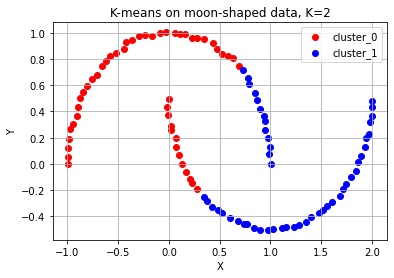

In [38]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
# 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.
moon_points, moon_labels = make_moons(n_samples = 100, noise = 0.01)

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 달 모양 데이터 plot
moon_kmeans = KMeans(n_clusters = 2)
moon_kmeans.fit(moon_points)
color_dict = {0:'red', 1:'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:,0], cluster_sub_points[:,1],
              c = color_dict[cluster], label = 'cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

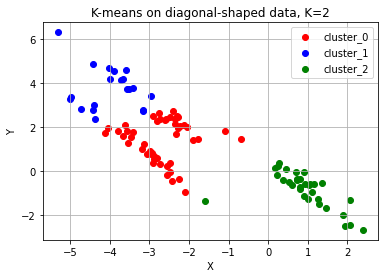

In [39]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
#대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
diag_points, _ = make_blobs(n_samples = 100, random_state = 170)
transformation = [[0.6, -0.6], [-0.4, 0.8]] # 대각선 변환을 위한 대각행렬

#본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.
diag_points = np.dot(diag_points, transformation) 

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters = 3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1],
              c = color_dict[cluster], label = 'cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 4
DBSCAN Y-hat: [-1  0  0  0 -1  1  1  1  3  0  1  2 -1  2  2  1  1  2  0 -1  0  2  2  2
  2  0  3  2  1  0  3  1  2 -1 -1  0  1  1  0  1  0  2  0  1 -1  2  2  1
  0  2 -1  0  2  0 -1 -1 -1  0 -1 -1 -1  2  0  1  0  2  0 -1  0  2  1  1
  1 -1  1  2  0  1  2  2  1  1  1  2  0  1  2  2 -1  2  0  2  2  1  0  2
  1  0  0  1]


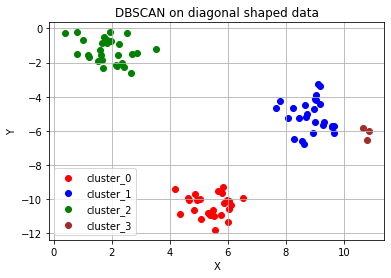

In [40]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
from sklearn.datasets import make_circles, make_moons, make_blobs
diag_points, _ = make_blobs(n_samples = 100, random_state = 200)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps = epsilon, min_samples = minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1],
               c= color_dict[cluster], label = 'cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()


In [41]:
diag_points.shape

(100, 2)

In [42]:
from sklearn.decomposition import PCA
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple', 5:'k'} 
target_dict = {0: 'malignat_train', 1: 'benign_train', 2: 'malignant_test', 3: 'benign_test',  4: '2ndmalignant_test', 5: '2ndbenign_test'}

pca = PCA(n_components =2)
pc = pca.fit_transform(train_modified_VGG16_representations)

In [43]:
# pc_test = pca_test.fit_transform(val_modified_VGG16_representations)

In [44]:
# PCA를 적용한 train data의 classifier 훈련: classfier로 SVM
# 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf = svm.SVC(kernel = 'rbf', gamma = 0.5, C = 0.8)
clf.fit(pc, y_train) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel='rbf', gamma = 0.5, C = 0.8)  # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_modified_VGG16_representations, y_train)

SVC(C=0.8, gamma=0.5)

In [45]:
# # 훈련한 classifier의 decision boundary를 그리는 함수
# def plot_decision_boundary(X, clf, ax):
#     h = .02 # step size in the mesh
    
#     #create a mesh to plot in
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     ax.contour(xx, yy, Z, cmap = 'Blues')
# # 캔버스 도식
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

# # malignant와 benign의 SVM decision boundary 그리기
# plot_decision_boundary(pc, clf, ax)

In [46]:
# # Train data 도식
# for cluster in range(2):
#     sub_cancer_points = pc[y_train ==cluster]
#     ax.scatter(sub_cancer_points[:,0], sub_cancer_points[:,1],
#               edgecolor = color_dict[cluster], c = 'none',
#               label = target_dict[cluster])
# # Test data 도식
# for cluster in range(2):
#     sub_cancer_points = pc_test[y_test ==cluster]
#     ax.scatter(sub_cancer_points[:,0], sub_cancer_points[:,1],
#               marker = 'x', c = color_dict[cluster+2],
#               label = target_dict[cluster+2])

# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_title('PCA-Breast cancer dataset')
# ax.legend()
# ax.grid()

### PCA

In [48]:
n_image = train_modified_VGG16_representations.shape[0]
n_image_pixel = train_modified_VGG16_representations.shape[1]

#  픽셀정보가 있는 칼럼의 이름을 담은 목록
pixel_columns = [ f"pixel{i}" for i in range(1, n_image_pixel +1)]
len(pixel_columns)

1024

In [49]:
from sklearn.decomposition import PCA

print('df_subset의 shape: {}'.format(train_modified_VGG16_representations.shape))

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components = n_dimension)

pca_result = pca.fit_transform(train_modified_VGG16_representations[pixel_columns].values)# 차원을 축소한 결과
train_modified_VGG16_representations['pca-one'] = pca_result[:,0]   # 축소한 결과의 첫 번째 차원 값
train_modified_VGG16_representations['pca-two'] = pca_result[:,1]   # 축소한 결과의 두 번째 차원 값

print('pca_result의 shape: {}'.format(pca_result.shape))

df_subset의 shape: (630, 1024)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# 784차원을 2차원으로 차원축소 하였을 때, 정보량이 전체의 16.9%가 남게 됩니다.
print(f"pca-1: {round(pca.explained_variance_ratio_[0], 3)* 100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1], 3)* 100}%")

In [ ]:
plt.figure(figsize=(10,6))
# 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
sns.scatterplot(x="pca-one", y = "pca-two", hue = "y",
               palette = sns.color_palette("hls", 10), data=train_modified_VGG16_representations,
                legend = "full", alpha = 0.4)

### TSNE

In [50]:
n_image = train_modified_VGG16_representations.shape[0]
n_image_pixel = train_modified_VGG16_representations.shape[1]

#  픽셀정보가 있는 칼럼의 이름을 담은 목록
pixel_columns = [ f"pixel{i}" for i in range(1, n_image_pixel +1)]
len(pixel_columns)

1024

In [53]:
df = pd.DataFrame(train_modified_VGG16_representations, columns = pixel_columns)
df['y'] = y_train
# 숫자 라벨을 스트링으로 만드는 함수를 파이썬 람다 문법으로 전체 데이터에 적용합니다.
df['y'] = df['y'].apply(lambda i: str(i))

ValueError: cannot reindex from a duplicate axis

In [ ]:
pixel_columns

In [ ]:

print(df.shape)
df.head()

In [ ]:
df_y = pd.DataFrame(y_train)
df_y.head()

In [ ]:
df.head()

In [ ]:
# df_y.reset_index()
# index_
# for i in range(len(df_y)):
# #     df_y.iloc[i].set_index(i)
# df_y.iloc[0].reset_index().set_index(0)
# df_y.head()

In [ ]:
import copy
df['y'] = df_y

In [ ]:
# 숫자 라벨을 스트링으로 만드는 함수를 파이썬 람다 문법으로 전체 데이터에 적용합니다.
df['y'] = df['y'].apply(lambda i: str(i))
# X, y = None, None

In [54]:
from sklearn.manifold import TSNE

print('df_subset의 shape: {}'.format(train_modified_VGG16_representations.shape))

data_subset = train_modified_VGG16_representations[pixel_columns].values
n_dimension =2
tsne = TSNE(n_components = n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print('tsne_results의 shape: {}'.format(tsne_results.shape))

df_subset의 shape: (630, 1024)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# tsne 결과를 차원별로 추가합니다.
train_modified_VGG16_representations['tsne-2d-one'] = tsne_results[:,0]
train_modified_VGG16_representations['tsne-2d-two'] = tsne_results[:,1]

# 시각화
plt.figure(figsize =(10,6))
sns.scatterplot(x = 'tsne-2d-one', y = 'tsne-2d-two', hue = 'y',
               palette = sns.color_palette('hls', 10), data = train_modified_VGG16_representations,
               legend = 'full', alpha = 0.3)

In [67]:
# class target 정보 제외
train_df = pd.DataFrame(train_modified_VGG16_representations)

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [69]:
type(train_df)

pandas.core.frame.DataFrame

In [66]:
df_y = np.array(y_train)
df_y = pd.DataFrame(df_y)
print(type(df_y))
df_y

<class 'pandas.core.frame.DataFrame'>


,0
0,4
1,2
2,5
3,0
4,2
...,...
625,4
626,2
627,5
628,5


In [71]:
tsne_df['target'] = pd.DataFrame(df_y)

In [72]:
# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]

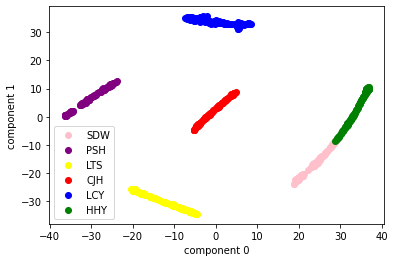

<Figure size 432x288 with 0 Axes>

In [76]:
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'SDW')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'PSH')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'LTS')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'red', label = 'CJH')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'blue', label = 'LCY')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'green', label = 'HHY')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()
plt.savefig('tsne_sample.png')

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(DT_classifier, out_file="tree.dot", class_names=[4, 5, 6] , \
feature_names = feature.columns, impurity=True, filled=True)

In [ ]:
X_combined_std = np.vstack((train_modified_VGG16_representations, test_modified_VGG16_representations))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X = X_combined_std, y = y_combined, classifier = KN_classifier,
                    test_idx = range(5, 40), title = 'KN classifier')


In [ ]:
from sklearn.semi_supervised import LabelSpreading
k3_fit_ls_labeled = (LabelSpreading(kernel='knn', n_neighbors=3).fit(train_simpler_VGG16_representations, y_train))


In [ ]:
print(y_test.shape)
print(k3_pred_ls_labeled.shape)

In [ ]:
from sklearn.metrics import f1_score
k3_pred_ls_labeled = k3_fit_ls_labeled.predict(test_simpler_VGG16_representations)
k3_f1_ls_labeled = f1_score(y_test, k3_pred_ls_labeled, average='micro')
k3_f1_ls_labeled

In [ ]:
train_simpler_VGG16_representations.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB()
clf.fit(train_simpler_VGG16_representations, y_train)
score = clf.score(test_simpler_VGG16_representations, y_test)
score

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("Precision Score : ",precision_score(y_test,y_pred, average='micro'))
# print("Precision Score : ",precision_score(y_test,y_pred,pos_label='positive', average='micro'))
print("Recall Score :" , recall_score(y_test, y_pred, average='micro'))
# print("Recall Score :" , recall_score(y_test, y_pred, pos_label='positive', average='micro'))

In [ ]:
# 클러스터 레이블을 추출.
target_cluster_num = 3
kmeans = KMeans(n_clusters=target_cluster_num, random_state=10).fit(train_simpler_VGG16_representations)

cluster_label = kmeans.predict(test_simpler_VGG16_representations)

print('슝~')

In [ ]:
print(X_train.shape)
print()

# 4. 예측 및 결과 비교